# DATA CONNECTION

In [1]:
!python3 -m pip install mysql-client --user


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
myvars = {}
with open("ajilla-mysql-password") as myfile:
    for line in myfile:
        name, var = line.partition(":")[::2]
        myvars[name.strip()] = var.strip()

In [3]:
import MySQLdb
conn = MySQLdb.connect(host="localhost", user=myvars['DB username'], passwd=myvars['DB password'], db='I501_Spring2024_Sec22490_group02_db')
cursor = conn.cursor()

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
cursor.execute('SELECT * FROM PatientData');
rows=cursor.fetchall()

# DATA DESCRIPTION

In [5]:
import pandas as pd
query = "SELECT * FROM PatientData"
df = pd.read_sql(query, conn)
df.describe()

/tmp/ipykernel_1495773/1700667118.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,Age,Weight,PreDialysisBloodPressure,DuringDialysisBloodPressure,PostDialysisBloodPressure,HeartRate,Creatinine,Urea,Potassium,Hemoglobin,Hematocrit,Albumin,DialysisDurationHours,DialysisFrequencyPerWeek,KtV,URR,UrineOutputMLPerDay,DryWeightKG,FluidRemovalRateMLPerHour
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,53.433200,84.640320,139.812000,125.127600,109.769000,79.48040,5.491776,57.259880,4.507120,11.479880,37.470440,3.99978,4.006300,2.013800,1.502174,70.01120,497.903800,80.329720,350.067540
std,20.931669,20.285619,23.294737,20.037006,17.402937,11.53193,2.589487,24.692911,0.575339,2.014652,4.321661,0.57736,0.581761,0.820819,0.287894,2.88729,290.754627,20.382646,85.854451
min,18.000000,50.000000,100.000000,90.000000,80.000000,60.00000,1.000000,15.000000,3.500000,8.000000,30.000000,3.00000,3.000000,1.000000,1.000000,65.00000,0.000000,45.000000,200.000000
25%,35.000000,66.900000,119.000000,108.000000,95.000000,70.00000,3.230000,35.700000,4.000000,9.700000,33.700000,3.50000,3.500000,1.000000,1.260000,67.50000,244.000000,62.700000,275.875000
50%,53.000000,84.200000,140.000000,125.000000,110.000000,80.00000,5.505000,57.500000,4.500000,11.500000,37.500000,4.00000,4.000000,2.000000,1.500000,70.00000,493.000000,80.200000,353.500000
75%,72.000000,102.300000,160.000000,142.000000,125.000000,89.25000,7.722500,78.900000,5.000000,13.200000,41.200000,4.50000,4.500000,3.000000,1.750000,72.50000,748.000000,98.100000,423.000000
max,89.000000,120.000000,179.000000,159.000000,139.000000,99.00000,9.990000,100.000000,5.500000,15.000000,45.000000,5.00000,5.000000,3.000000,2.000000,75.00000,999.000000,115.000000,499.900000


In [6]:
df

,Age,Gender,Weight,Diabetes,Hypertension,KidneyFailureCause,PreDialysisBloodPressure,DuringDialysisBloodPressure,PostDialysisBloodPressure,HeartRate,...,DialysisFrequencyPerWeek,DialysateComposition,VascularAccessType,DialyzerType,KtV,URR,UrineOutputMLPerDay,DryWeightKG,FluidRemovalRateMLPerHour,DiseaseSeverity
0,62,Female,97.4,TRUE,TRUE,Other,103,133,84,78,...,3,Customized,Graft,Low-flux,1.18,66.6,146,105.8,439.7,Severe
1,65,Male,72.7,TRUE,FALSE,Hypertension,164,132,84,68,...,2,Customized,Catheter,Low-flux,1.67,74.2,723,79.0,364.1,Severe
2,82,Male,111.6,FALSE,TRUE,Other,102,126,115,62,...,3,Customized,Catheter,Low-flux,1.84,65.3,495,114.2,337.9,Severe
3,85,Male,60.0,FALSE,FALSE,Hypertension,155,115,99,89,...,3,Customized,Fistula,High-flux,1.87,67.4,36,66.8,223.6,Severe
4,85,Male,52.1,FALSE,FALSE,Diabetes,140,152,124,75,...,3,Customized,Graft,High-flux,1.84,68.4,797,106.9,359.2,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,48,Female,56.4,TRUE,TRUE,Hypertension,131,113,131,84,...,1,Standard,Fistula,High-flux,1.84,65.0,622,100.5,354.2,Moderate
4996,77,Male,66.6,FALSE,TRUE,Diabetes,150,144,90,63,...,1,Standard,Fistula,Low-flux,1.60,68.1,266,70.5,252.9,Severe
4997,26,Female,95.1,FALSE,FALSE,Hypertension,153,149,110,98,...,2,Standard,Fistula,Low-flux,1.92,67.1,56,84.7,282.8,Severe
4998,81,Female,99.9,FALSE,TRUE,Diabetes,152,102,96,89,...,3,Standard,Graft,Low-flux,1.16,65.6,974,110.4,444.9,Severe


In [7]:
df.dtypes

Age                              int64
Gender                          object
Weight                         float64
Diabetes                        object
Hypertension                    object
KidneyFailureCause              object
PreDialysisBloodPressure         int64
DuringDialysisBloodPressure      int64
PostDialysisBloodPressure        int64
HeartRate                        int64
Creatinine                     float64
Urea                           float64
Potassium                      float64
Hemoglobin                     float64
Hematocrit                     float64
Albumin                        float64
DialysisDurationHours          float64
DialysisFrequencyPerWeek         int64
DialysateComposition            object
VascularAccessType              object
DialyzerType                    object
KtV                            float64
URR                            float64
UrineOutputMLPerDay              int64
DryWeightKG                    float64
FluidRemovalRateMLPerHour

# DATA PREPROCESSING

### Duplicate Values

In [8]:
df_no_duplicates = df.drop_duplicates()

print("Shape of DataFrame before removing duplicates:", df.shape)
print("Shape of DataFrame after removing duplicates:", df_no_duplicates.shape)

Shape of DataFrame before removing duplicates: (5000, 27)
Shape of DataFrame after removing duplicates: (5000, 27)


### Null values

In [9]:
df.isnull().sum()

Age                            0
Gender                         0
Weight                         0
Diabetes                       0
Hypertension                   0
KidneyFailureCause             0
PreDialysisBloodPressure       0
DuringDialysisBloodPressure    0
PostDialysisBloodPressure      0
HeartRate                      0
Creatinine                     0
Urea                           0
Potassium                      0
Hemoglobin                     0
Hematocrit                     0
Albumin                        0
DialysisDurationHours          0
DialysisFrequencyPerWeek       0
DialysateComposition           0
VascularAccessType             0
DialyzerType                   0
KtV                            0
URR                            0
UrineOutputMLPerDay            0
DryWeightKG                    0
FluidRemovalRateMLPerHour      0
DiseaseSeverity                0
dtype: int64

### Outliers

In [12]:
import pandas as pd
import numpy as np

def detect_outliers_by_column(df, whisker_factor=1.5):
    outliers = {}
    for column in df.columns:
        if not pd.api.types.is_numeric_dtype(df[column]):
            continue  
        q1, q3 = np.percentile(df[column], [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - (whisker_factor * iqr)
        upper_bound = q3 + (whisker_factor * iqr)
        outliers[column] = ~((df[column] >= lower_bound) & (df[column] <= upper_bound))
        num_outliers = outliers[column].sum()  
        print(f"Number of outliers in column '{column}': {num_outliers}")  
    return outliers
outliers_per_column = detect_outliers_by_column(df)
for col, outliers in outliers_per_column.items():
    print(f"Outliers in column '{col}':")
    print(outliers)

Number of outliers in column 'Age': 0
Number of outliers in column 'Weight': 0
Number of outliers in column 'PreDialysisBloodPressure': 0
Number of outliers in column 'DuringDialysisBloodPressure': 0
Number of outliers in column 'PostDialysisBloodPressure': 0
Number of outliers in column 'HeartRate': 0
Number of outliers in column 'Creatinine': 0
Number of outliers in column 'Urea': 0
Number of outliers in column 'Potassium': 0
Number of outliers in column 'Hemoglobin': 0
Number of outliers in column 'Hematocrit': 0
Number of outliers in column 'Albumin': 0
Number of outliers in column 'DialysisDurationHours': 0
Number of outliers in column 'DialysisFrequencyPerWeek': 0
Number of outliers in column 'KtV': 0
Number of outliers in column 'URR': 0
Number of outliers in column 'UrineOutputMLPerDay': 0
Number of outliers in column 'DryWeightKG': 0
Number of outliers in column 'FluidRemovalRateMLPerHour': 0
Outliers in column 'Age':
0       False
1       False
2       False
3       False
4  

# EXPLORATORY DATA ANALYSIS (EDA)

In [13]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Box & Whisker plots

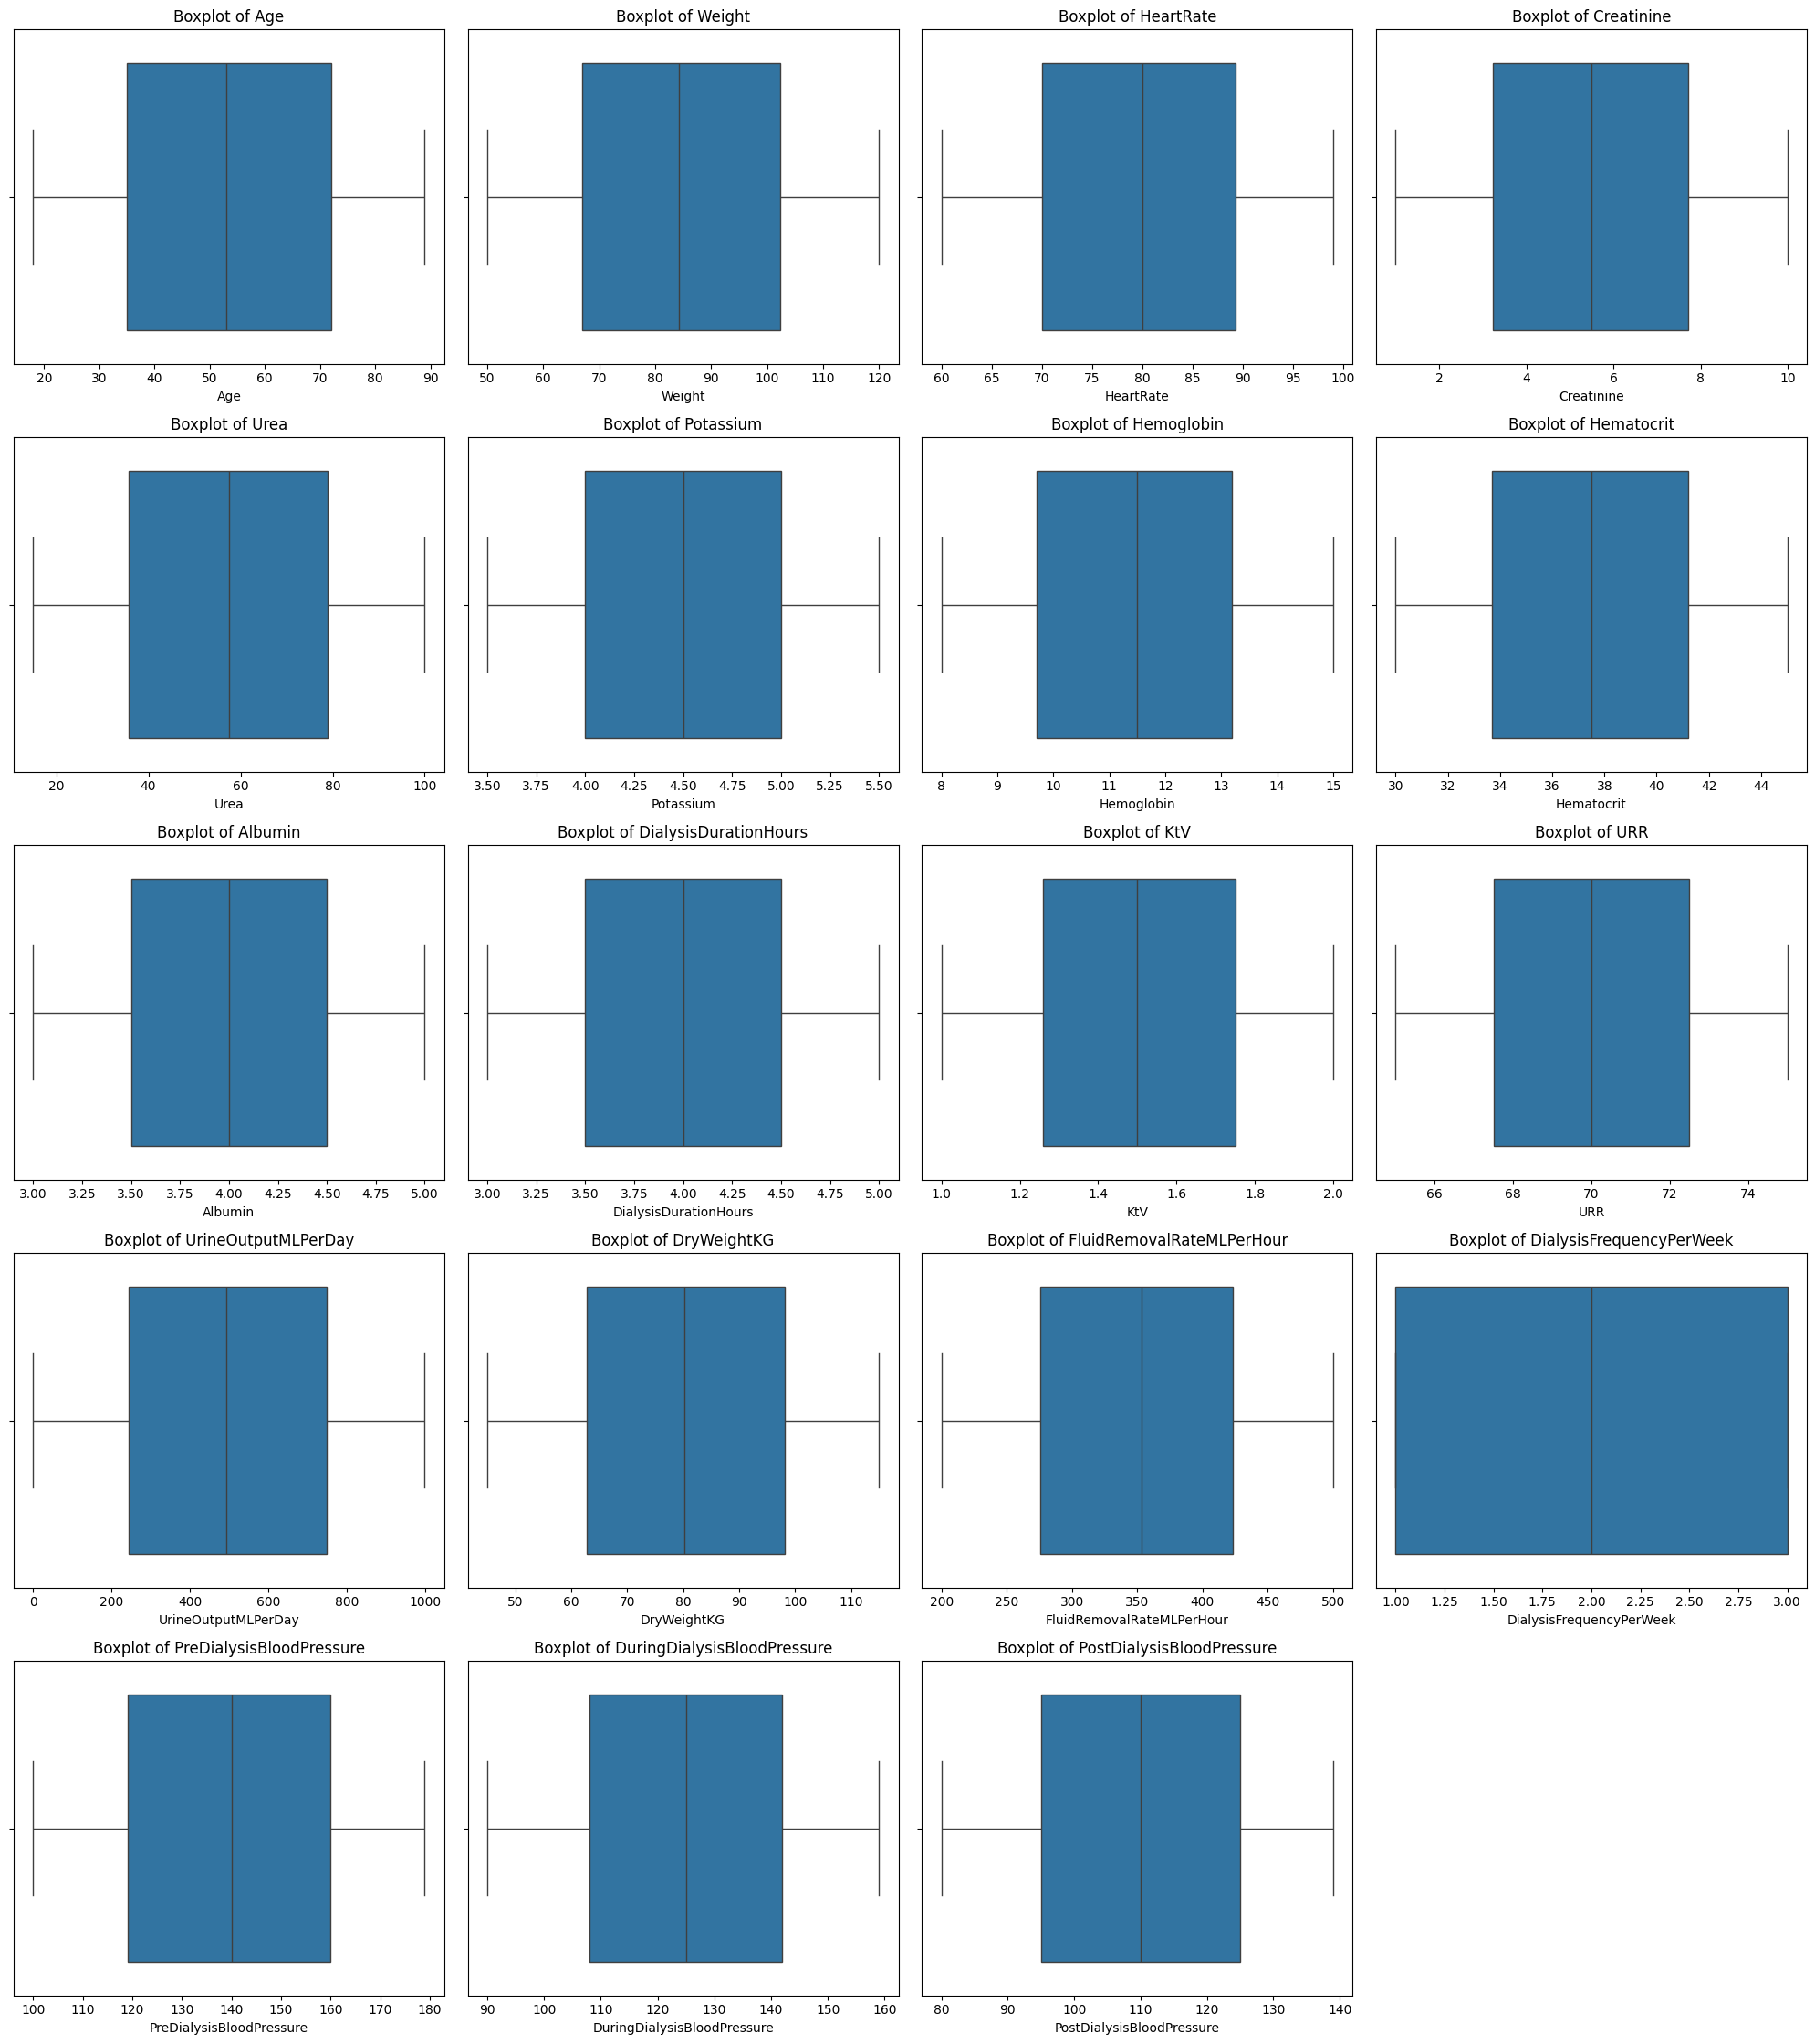

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

outlier_cols = ['Age', 'Weight', 'HeartRate', 'Creatinine', 'Urea', 'Potassium', 'Hemoglobin', 'Hematocrit',
                'Albumin', 'DialysisDurationHours', 'KtV', 'URR', 'UrineOutputMLPerDay', 'DryWeightKG',
                'FluidRemovalRateMLPerHour', 'DialysisFrequencyPerWeek', 'PreDialysisBloodPressure',
                'DuringDialysisBloodPressure', 'PostDialysisBloodPressure']

num_plots = len(outlier_cols)
num_rows = (num_plots - 1) // 4 + 1  

fig, axes = plt.subplots(num_rows, 4, figsize=(20, num_rows * 4.5))  

if num_rows == 1:
    axes = axes.reshape(1, -1)

for i, col in enumerate(outlier_cols):
    row = i // 4
    col_index = i % 4  
    sns.boxplot(x=col, data=df, ax=axes[row, col_index])
    axes[row, col_index].set_title(f'Boxplot of {col}')
    axes[row, col_index].set_xlabel(col)

for i in range(num_plots, num_rows * 4):  
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


### Barcharts

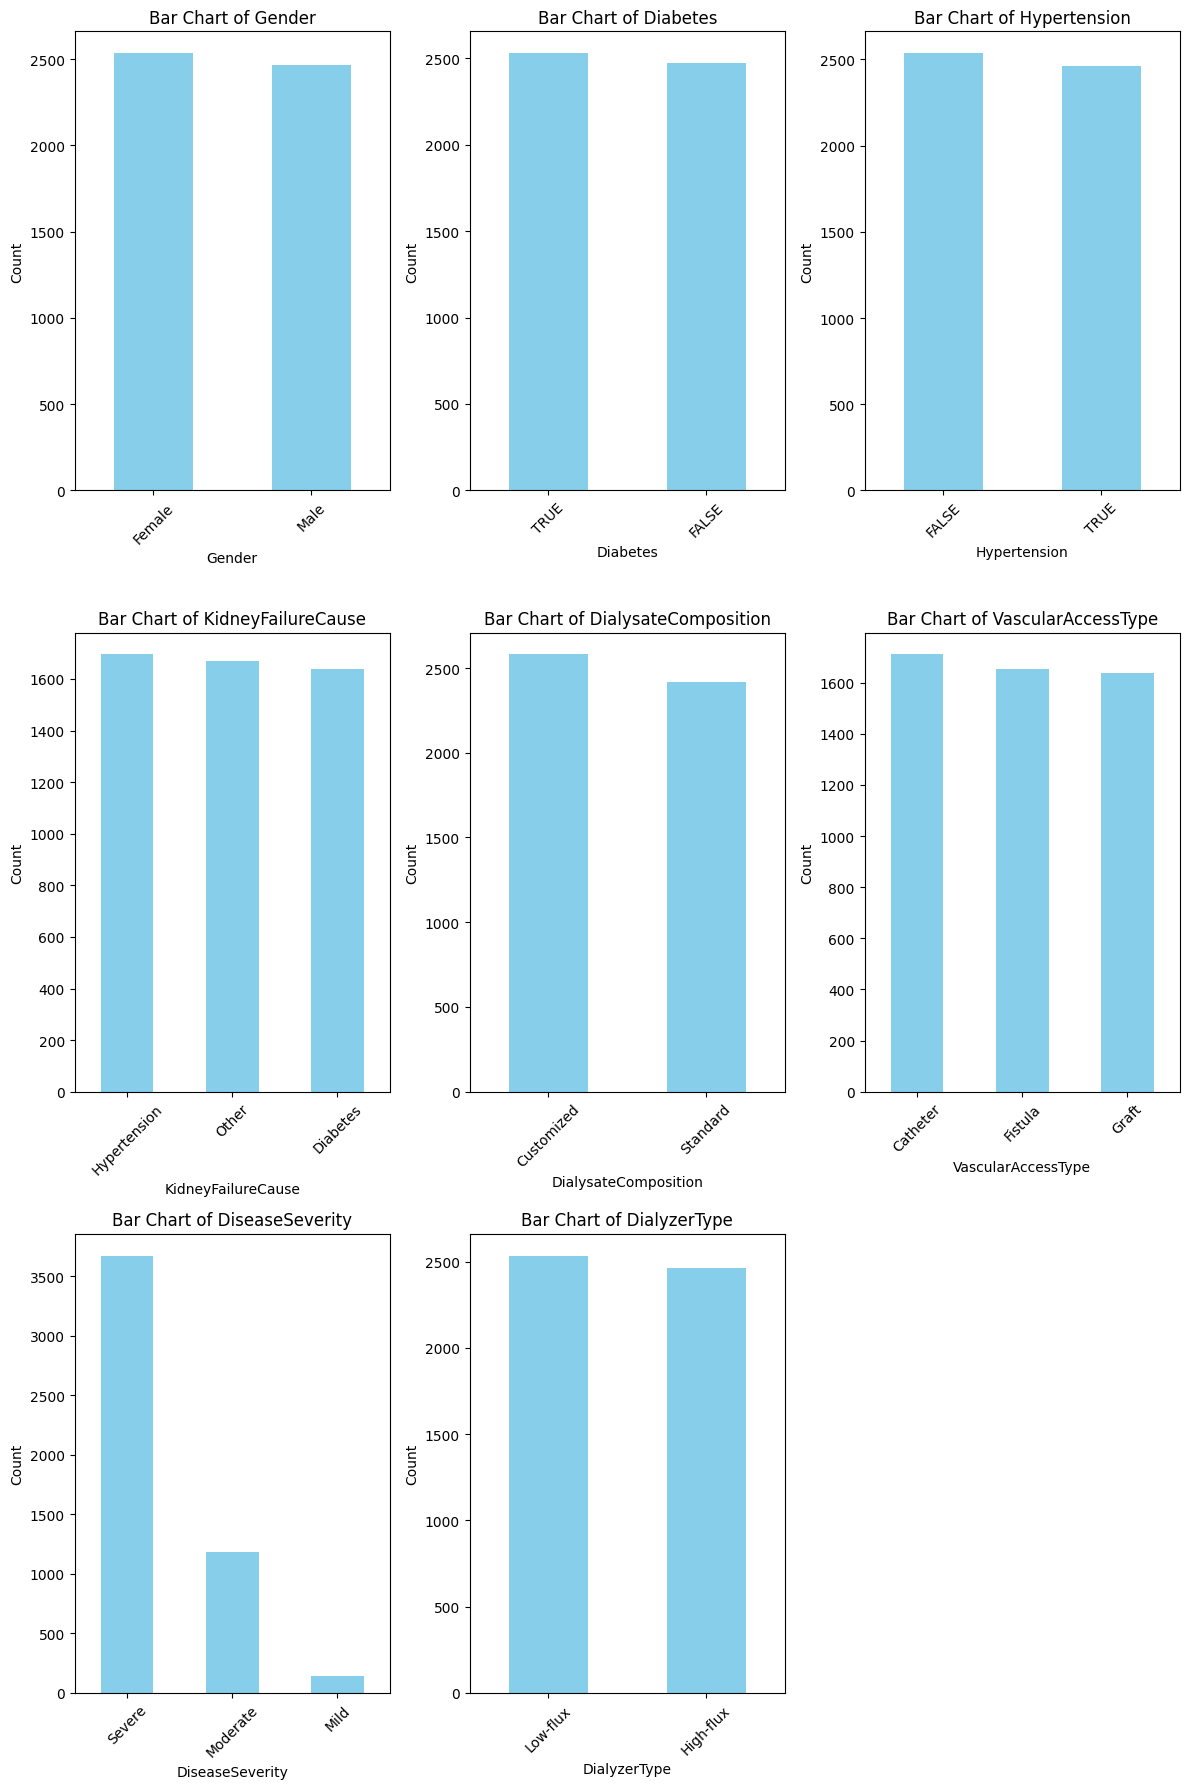

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

categorical_variables = ['Gender', 'Diabetes', 'Hypertension', 
                         'KidneyFailureCause', 'DialysateComposition',
                         'VascularAccessType','DiseaseSeverity', 'DialyzerType']

num_plots = len(categorical_variables)
num_rows = (num_plots - 1) // 3 + 1  # Calculate number of rows needed for 2 columns

fig, axes = plt.subplots(num_rows, 3, figsize=(12, num_rows * 6))  # Subplots with 2 columns

if num_rows == 1:
    axes = axes.reshape(1, -1)

for i, variable in enumerate(categorical_variables):
    row = i // 3
    col_index = i % 3
    ax = axes[row, col_index]
    df[variable].value_counts().plot(kind='bar', color='skyblue', ax=ax)
    ax.set_title(f'Bar Chart of {variable}')
    ax.set_xlabel(variable)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

# Remove any extra empty subplot
for i in range(num_plots, num_rows * 3):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


### Piecharts

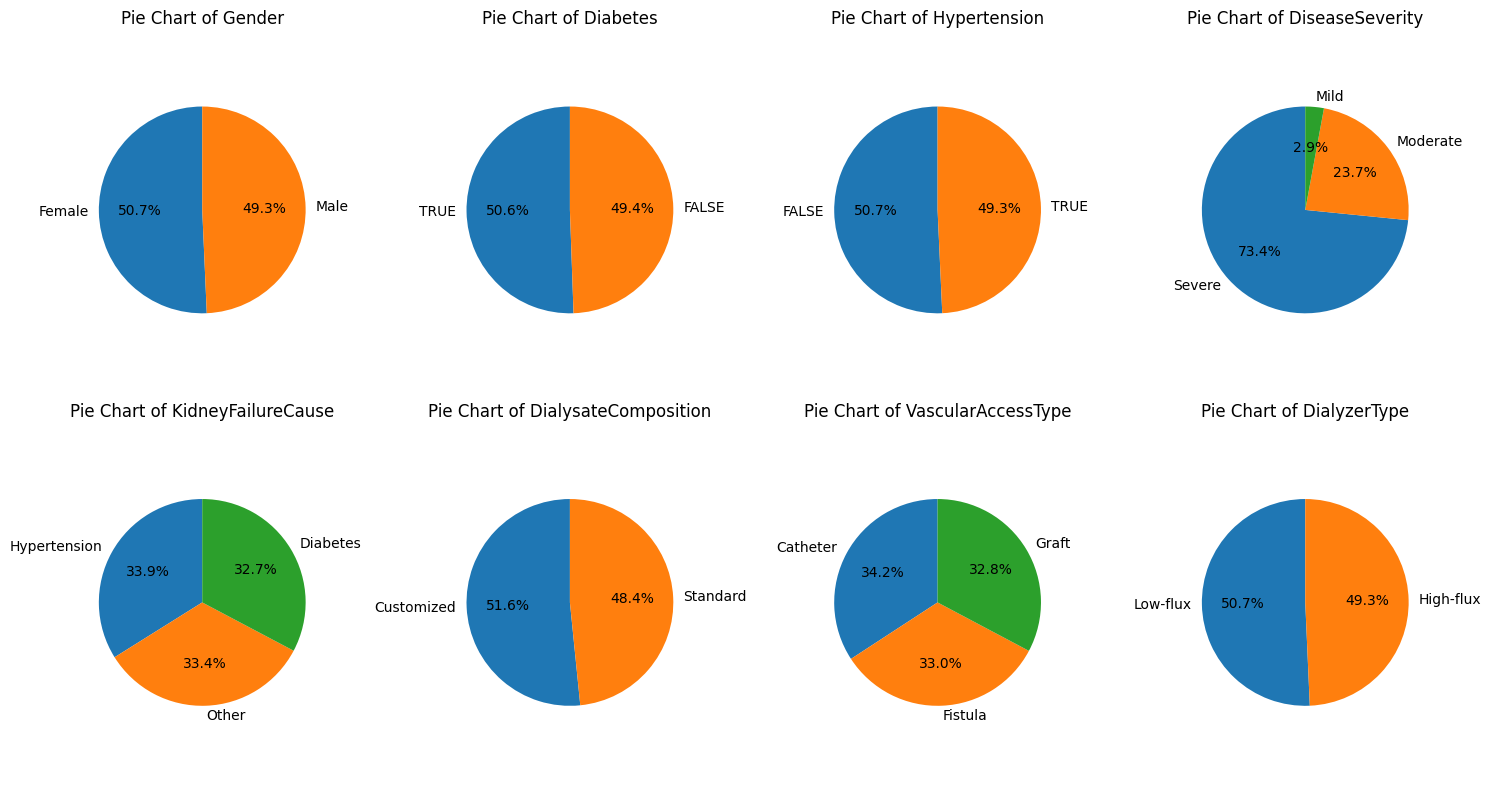

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

categorical_variables = ['Gender', 'Diabetes', 'Hypertension', 'DiseaseSeverity',
                         'KidneyFailureCause', 'DialysateComposition',
                         'VascularAccessType', 'DialyzerType']

num_plots = len(categorical_variables)
num_rows = (num_plots - 1) // 4 + 1  # Calculate number of rows needed for 3 columns

fig, axes = plt.subplots(num_rows, 4, figsize=(15, num_rows * 4))  # Subplots with 3 columns

if num_rows == 1:
    axes = axes.reshape(1, -1)

for i, variable in enumerate(categorical_variables):
    row = i // 4
    col_index = i % 4
    ax = axes[row, col_index]
    df[variable].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax)
    ax.set_title(f'Pie Chart of {variable}')
    ax.set_ylabel('')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Remove any extra empty subplot
for i in range(num_plots, num_rows * 4):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


# STATISTICAL ANALYSIS

# Normality Testing

In [17]:
import pandas as pd
from scipy.stats import shapiro

selected_columns = ['Age', 'Weight', 'PreDialysisBloodPressure',
                   'DuringDialysisBloodPressure', 'PostDialysisBloodPressure', 'HeartRate',
                   'Creatinine', 'Urea', 'Potassium', 'Hemoglobin', 'Hematocrit',
                   'Albumin', 'DialysisDurationHours',
                   'KtV', 'URR', 'UrineOutputMLPerDay', 'DryWeightKG',
                   'FluidRemovalRateMLPerHour']

for column in selected_columns:
    stat, p = shapiro(df[column])
    print(f"Shapiro-Wilk test for column '{column}':")
    print(f"Test Statistic: {stat}, p-value: {p}")
    alpha = 0.05
    if p > alpha:
        print("Sample looks Gaussian")
    else:
        print("Sample does not look Gaussian ")
    print("\n")

Shapiro-Wilk test for column 'Age':
Test Statistic: 0.9539999961853027, p-value: 4.847630831956369e-37
Sample does not look Gaussian 


Shapiro-Wilk test for column 'Weight':
Test Statistic: 0.9542921781539917, p-value: 5.997394652480601e-37
Sample does not look Gaussian 


Shapiro-Wilk test for column 'PreDialysisBloodPressure':
Test Statistic: 0.9525333642959595, p-value: 1.6921208087022295e-37
Sample does not look Gaussian 


Shapiro-Wilk test for column 'DuringDialysisBloodPressure':
Test Statistic: 0.9559298753738403, p-value: 2.0182995500511634e-36
Sample does not look Gaussian 


Shapiro-Wilk test for column 'PostDialysisBloodPressure':
Test Statistic: 0.9534820318222046, p-value: 3.332539757680239e-37
Sample does not look Gaussian 


Shapiro-Wilk test for column 'HeartRate':
Test Statistic: 0.9537146091461182, p-value: 3.941578598269966e-37
Sample does not look Gaussian 


Shapiro-Wilk test for column 'Creatinine':
Test Statistic: 0.9546958208084106, p-value: 8.06185795135877e-

### NON-PARAMETRIC TESTS

### Chi-square Test

In [50]:
from scipy.stats import chi2_contingency

categorical_variables = ['Gender', 'Diabetes', 'Hypertension', 'DiseaseSeverity',
                         'KidneyFailureCause', 'DialysateComposition',
                         'VascularAccessType', 'DialyzerType']

target_variable = 'DialysisFrequencyPerWeek'
chi2_results = {}

for variable in categorical_variables:
    contingency_table = pd.crosstab(df[variable], df[target_variable])    
    chi2_stat, chi2_p, _, _ = chi2_contingency(contingency_table)
    chi2_results[variable] = {'Chi-square statistic': chi2_stat, 'p-value': chi2_p}

for variable, result in chi2_results.items():
    print(f"{variable}: Chi-square statistic = {result['Chi-square statistic']}, p-value = {result['p-value']}\n")


Gender: Chi-square statistic = 0.2151891216177439, p-value = 0.8979916036234705

Diabetes: Chi-square statistic = 0.009722141166217401, p-value = 0.9951507252992192

Hypertension: Chi-square statistic = 7.476376817977098, p-value = 0.023797174853415457

DiseaseSeverity: Chi-square statistic = 8.018336968920936, p-value = 0.09090879259088606

KidneyFailureCause: Chi-square statistic = 3.8673799211694977, p-value = 0.4242514497416163

DialysateComposition: Chi-square statistic = 1.1158168728589382, p-value = 0.5724050342059385

VascularAccessType: Chi-square statistic = 3.111130647642323, p-value = 0.539403239325601

DialyzerType: Chi-square statistic = 0.755719202168039, p-value = 0.6853267130392591



### Mann-Whitney U Test

In [51]:
from scipy.stats import mannwhitneyu

x = df[['Age', 'Weight', 'PreDialysisBloodPressure',
         'DuringDialysisBloodPressure', 'PostDialysisBloodPressure', 'HeartRate',
         'Creatinine', 'Urea', 'Potassium', 'Hemoglobin', 'Hematocrit',                                             
        'Albumin', 'DialysisDurationHours', 'DialysisFrequencyPerWeek',
        'KtV', 'URR', 'UrineOutputMLPerDay', 'DryWeightKG',
         'FluidRemovalRateMLPerHour']]
y = df['DialysisFrequencyPerWeek']

for feature in x.columns:
    u_statistic, p_value = mannwhitneyu(x[feature], y)
    print(f"Mann-Whitney U test for feature '{feature}':")
    print(f"U Statistic: {u_statistic}")
    print(f"P-value: {p_value}")
    if p_value < 0.05:
        print("There is a significant difference between groups.")
    else:
        print("There is no significant difference between groups.")
    print("-----------------------------------------")


Mann-Whitney U test for feature 'Age':
U Statistic: 25000000.0
P-value: 0.0
There is a significant difference between groups.
-----------------------------------------
Mann-Whitney U test for feature 'Weight':
U Statistic: 25000000.0
P-value: 0.0
There is a significant difference between groups.
-----------------------------------------
Mann-Whitney U test for feature 'PreDialysisBloodPressure':
U Statistic: 25000000.0
P-value: 0.0
There is a significant difference between groups.
-----------------------------------------
Mann-Whitney U test for feature 'DuringDialysisBloodPressure':
U Statistic: 25000000.0
P-value: 0.0
There is a significant difference between groups.
-----------------------------------------
Mann-Whitney U test for feature 'PostDialysisBloodPressure':
U Statistic: 25000000.0
P-value: 0.0
There is a significant difference between groups.
-----------------------------------------
Mann-Whitney U test for feature 'HeartRate':
U Statistic: 25000000.0
P-value: 0.0
There is

### Spearman Correlation Analysis

In [19]:
import pandas as pd
from scipy.stats import spearmanr

numerical_variables = ['Age', 'Weight', 'PreDialysisBloodPressure',
                       'DuringDialysisBloodPressure', 'PostDialysisBloodPressure', 
                       'HeartRate', 'Creatinine', 'Urea', 'Potassium', 
                       'Hemoglobin', 'Hematocrit', 'Albumin', 
                       'DialysisDurationHours', 
                       'KtV', 'URR', 'UrineOutputMLPerDay', 'DryWeightKG', 
                       'FluidRemovalRateMLPerHour']

target_variable = 'DialysisFrequencyPerWeek'

correlation_results = {}

for variable in numerical_variables:
    
    spearman_corr, spearman_p_value = spearmanr(df[variable], df[target_variable])
    correlation_results[variable] = {'Spearman Correlation': spearman_corr, 'Spearman p-value': spearman_p_value}

for variable, result in correlation_results.items():
    print(f"{variable}: Spearman Correlation = {result['Spearman Correlation']}, p-value = {result['Spearman p-value']}\n")


Age: Spearman Correlation = 0.003188037988045799, p-value = 0.8216894743179697

Weight: Spearman Correlation = -0.005708758802436297, p-value = 0.6865270634533349

PreDialysisBloodPressure: Spearman Correlation = -0.0104787193354684, p-value = 0.45881930834803086

DuringDialysisBloodPressure: Spearman Correlation = 0.00872018645810237, p-value = 0.5375857863295525

PostDialysisBloodPressure: Spearman Correlation = 0.011716308701734571, p-value = 0.40750661351636086

HeartRate: Spearman Correlation = 0.012589004660067276, p-value = 0.3734713894682373

Creatinine: Spearman Correlation = 0.008013576712210849, p-value = 0.5710451925568472

Urea: Spearman Correlation = 0.011376898705105757, p-value = 0.4212277163349313

Potassium: Spearman Correlation = -0.014389402043780065, p-value = 0.309018993400654

Hemoglobin: Spearman Correlation = -0.01565348154375028, p-value = 0.26844123950637383

Hematocrit: Spearman Correlation = 0.008896418004285148, p-value = 0.5293969085884815

Albumin: Spear

### Heat Maps

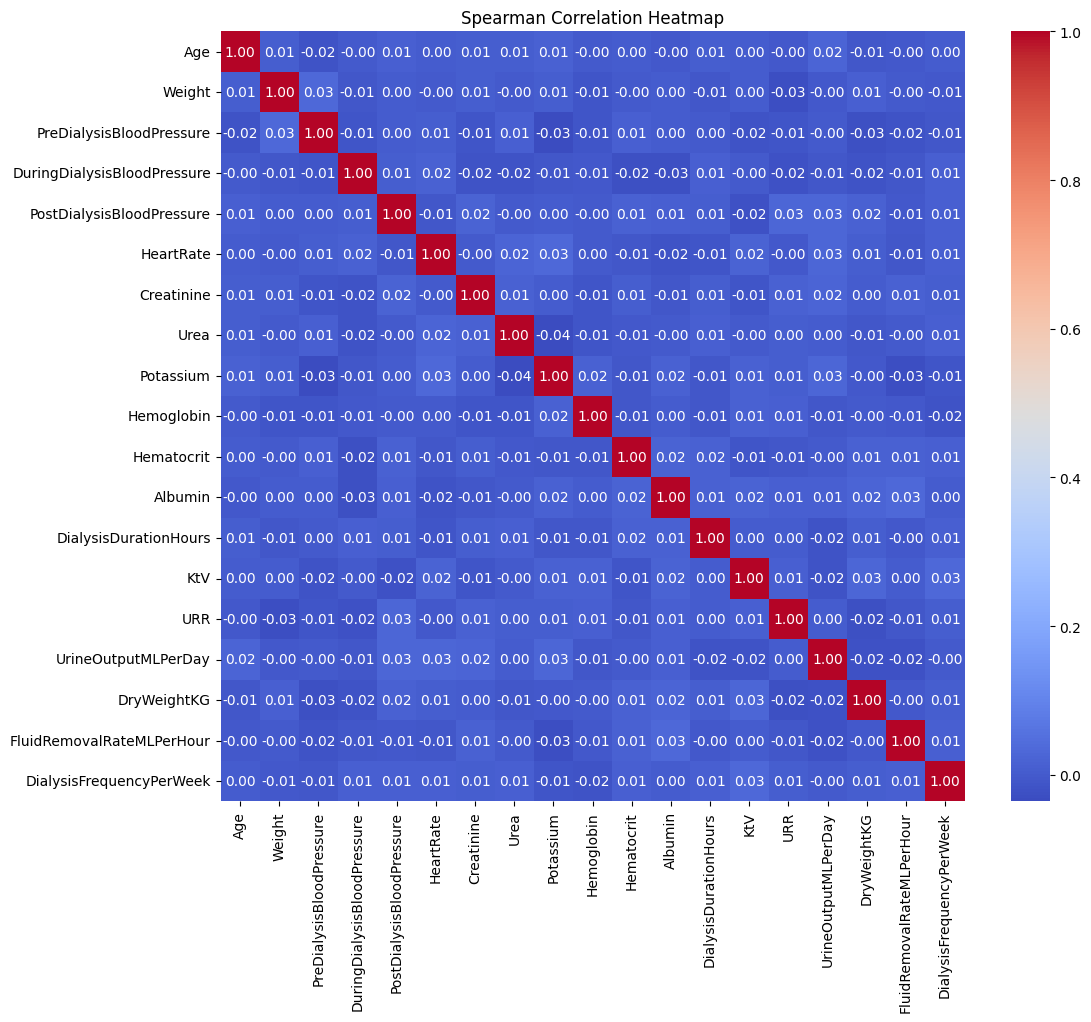

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

numerical_variables = ['Age', 'Weight', 'PreDialysisBloodPressure',
                       'DuringDialysisBloodPressure', 'PostDialysisBloodPressure', 
                       'HeartRate', 'Creatinine', 'Urea', 'Potassium', 
                       'Hemoglobin', 'Hematocrit', 'Albumin', 
                       'DialysisDurationHours', 
                       'KtV', 'URR', 'UrineOutputMLPerDay', 'DryWeightKG', 
                       'FluidRemovalRateMLPerHour', 'DialysisFrequencyPerWeek']

correlation_matrix = df[numerical_variables].corr(method='spearman')

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Heatmap')
plt.show()


# LABEL ENCODING

In [25]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

selected_columns = ['Gender', 'Diabetes', 'Hypertension', 'DiseaseSeverity','KidneyFailureCause','DialysateComposition','VascularAccessType','DialyzerType']
label_encoder = LabelEncoder()

for column in selected_columns:
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])
print(df)


      Age  Gender  Weight Diabetes Hypertension KidneyFailureCause  \
0      62  Female    97.4     TRUE         TRUE              Other   
1      65    Male    72.7     TRUE        FALSE       Hypertension   
2      82    Male   111.6    FALSE         TRUE              Other   
3      85    Male    60.0    FALSE        FALSE       Hypertension   
4      85    Male    52.1    FALSE        FALSE           Diabetes   
...   ...     ...     ...      ...          ...                ...   
4995   48  Female    56.4     TRUE         TRUE       Hypertension   
4996   77    Male    66.6    FALSE         TRUE           Diabetes   
4997   26  Female    95.1    FALSE        FALSE       Hypertension   
4998   81  Female    99.9    FALSE         TRUE           Diabetes   
4999   21  Female    79.2    FALSE        FALSE       Hypertension   

      PreDialysisBloodPressure  DuringDialysisBloodPressure  \
0                          103                          133   
1                          164   

<Figure size 1000x600 with 0 Axes>

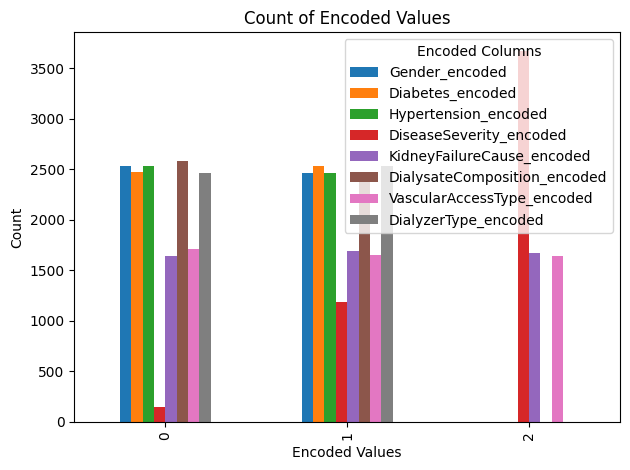

In [26]:
encoded_columns = ['Gender_encoded', 'Diabetes_encoded', 'Hypertension_encoded', 'DiseaseSeverity_encoded','KidneyFailureCause_encoded','DialysateComposition_encoded','VascularAccessType_encoded','DialyzerType_encoded']
value_counts = df[encoded_columns].apply(pd.Series.value_counts)

plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', stacked=False)
plt.xlabel('Encoded Values')
plt.ylabel('Count')
plt.title('Count of Encoded Values')
plt.xticks(range(len(value_counts.index)), value_counts.index)
plt.legend(title='Encoded Columns')
plt.tight_layout()
plt.show()

# DATA VISUALIZATION

### Visualizing Numerical Variables

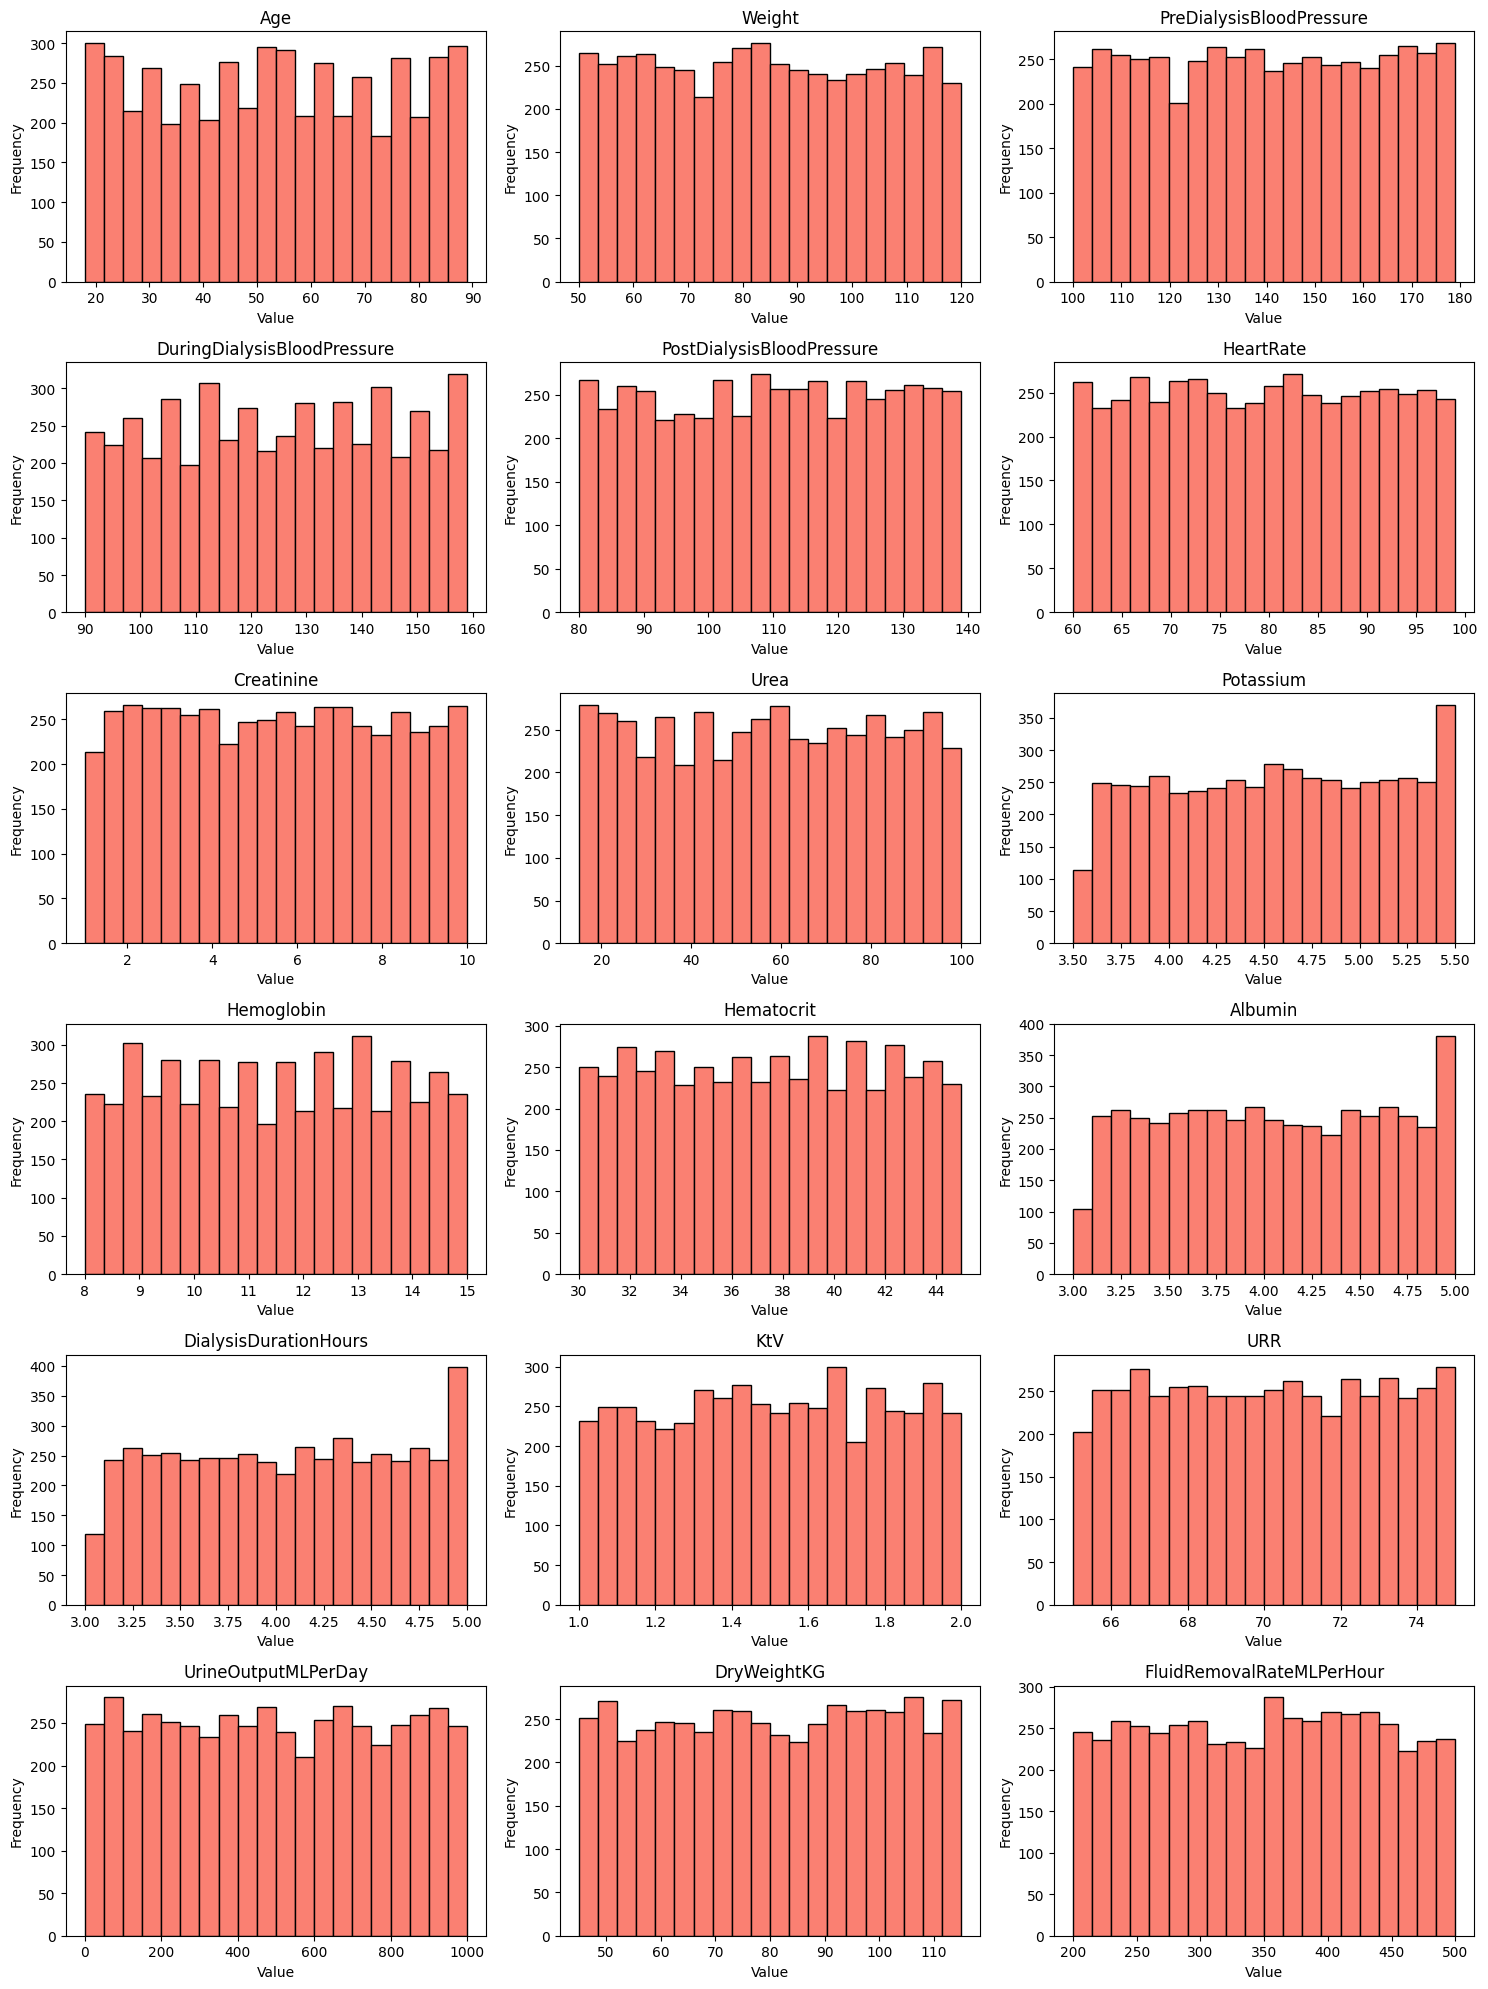

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

variables = ['Age', 'Weight', 'PreDialysisBloodPressure',
             'DuringDialysisBloodPressure', 'PostDialysisBloodPressure', 
             'HeartRate', 'Creatinine', 'Urea', 'Potassium', 
             'Hemoglobin', 'Hematocrit', 'Albumin', 
             'DialysisDurationHours', 'KtV', 'URR', 
             'UrineOutputMLPerDay', 'DryWeightKG', 'FluidRemovalRateMLPerHour']
fig, axs = plt.subplots(6, 3, figsize=(15, 20))
axs = axs.flatten()

for i, var in enumerate(variables):
    ax = axs[i]
    ax.hist(df[var], bins=20, color='salmon', edgecolor='black')
    ax.set_title(var)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()


### Age

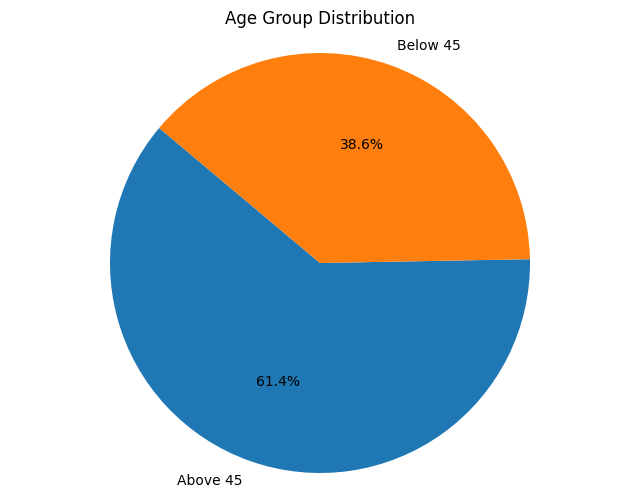

In [29]:
import matplotlib.pyplot as plt

df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 45, float('inf')], labels=['Below 45', 'Above 45'])
age_group_counts = df['AgeGroup'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Age Group Distribution')
plt.axis('equal')
plt.show()

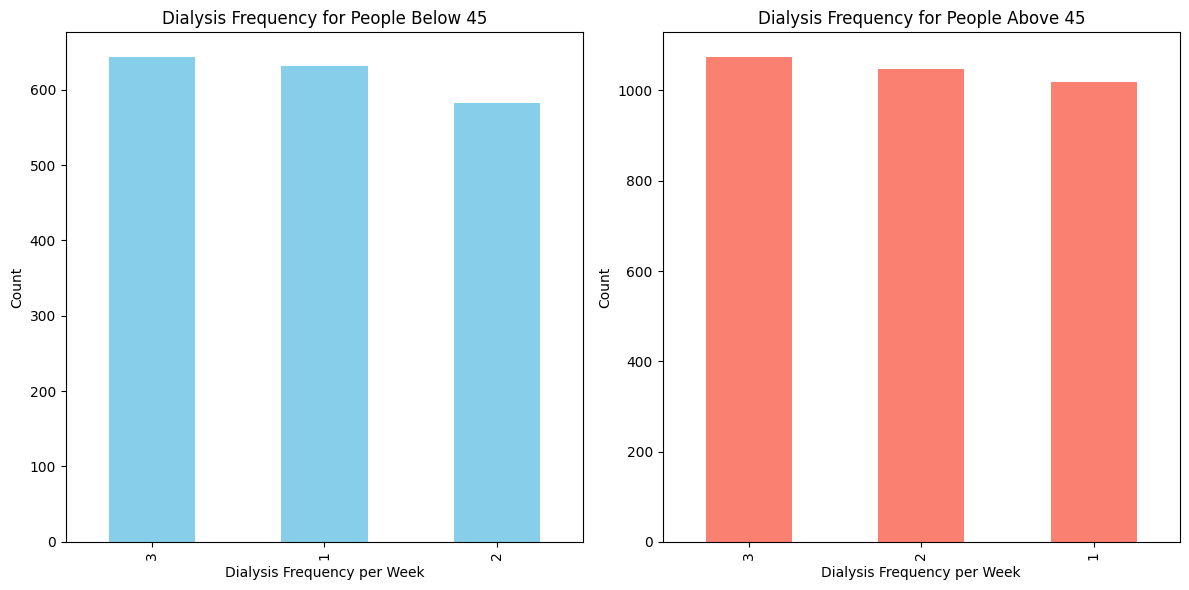

In [30]:
import matplotlib.pyplot as plt

below_45_df = df[df['Age'] < 45]
below_45_dialysis_freq_counts = below_45_df['DialysisFrequencyPerWeek'].value_counts()
above_45_df = df[df['Age'] >= 45]
above_45_dialysis_freq_counts = above_45_df['DialysisFrequencyPerWeek'].value_counts()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
below_45_dialysis_freq_counts.plot(kind='bar', color='skyblue')
plt.title('Dialysis Frequency for People Below 45')
plt.xlabel('Dialysis Frequency per Week')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
above_45_dialysis_freq_counts.plot(kind='bar', color='salmon')
plt.title('Dialysis Frequency for People Above 45')
plt.xlabel('Dialysis Frequency per Week')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Kidney Failure Cause

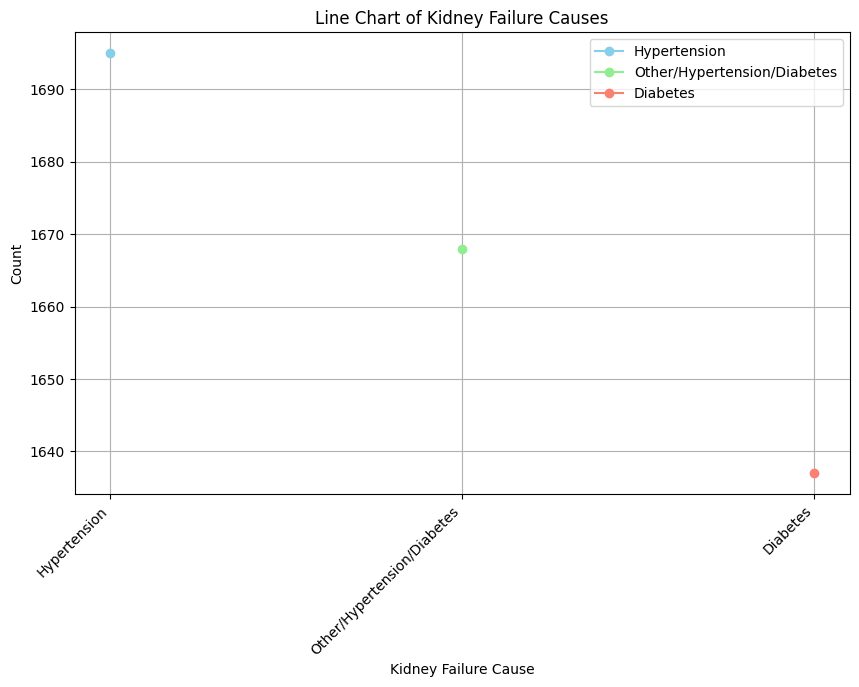

In [54]:
import matplotlib.pyplot as plt

df['KidneyFailureCause'] = df['KidneyFailureCause'].replace({'Other': 'Other/Hypertension/Diabetes'})
kidney_failure_counts = df['KidneyFailureCause'].value_counts()

colors = {'Hypertension': 'skyblue', 'Diabetes': 'salmon', 'Other/Hypertension/Diabetes': 'lightgreen'}
plt.figure(figsize=(10, 6))
for cause, count in kidney_failure_counts.items():
    plt.plot([cause], [count], marker='o', color=colors[cause], label=cause)

plt.title('Line Chart of Kidney Failure Causes')
plt.xlabel('Kidney Failure Cause')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
colors = ['skyblue', 'salmon', 'lightgreen']
plt.legend()
plt.grid(True)

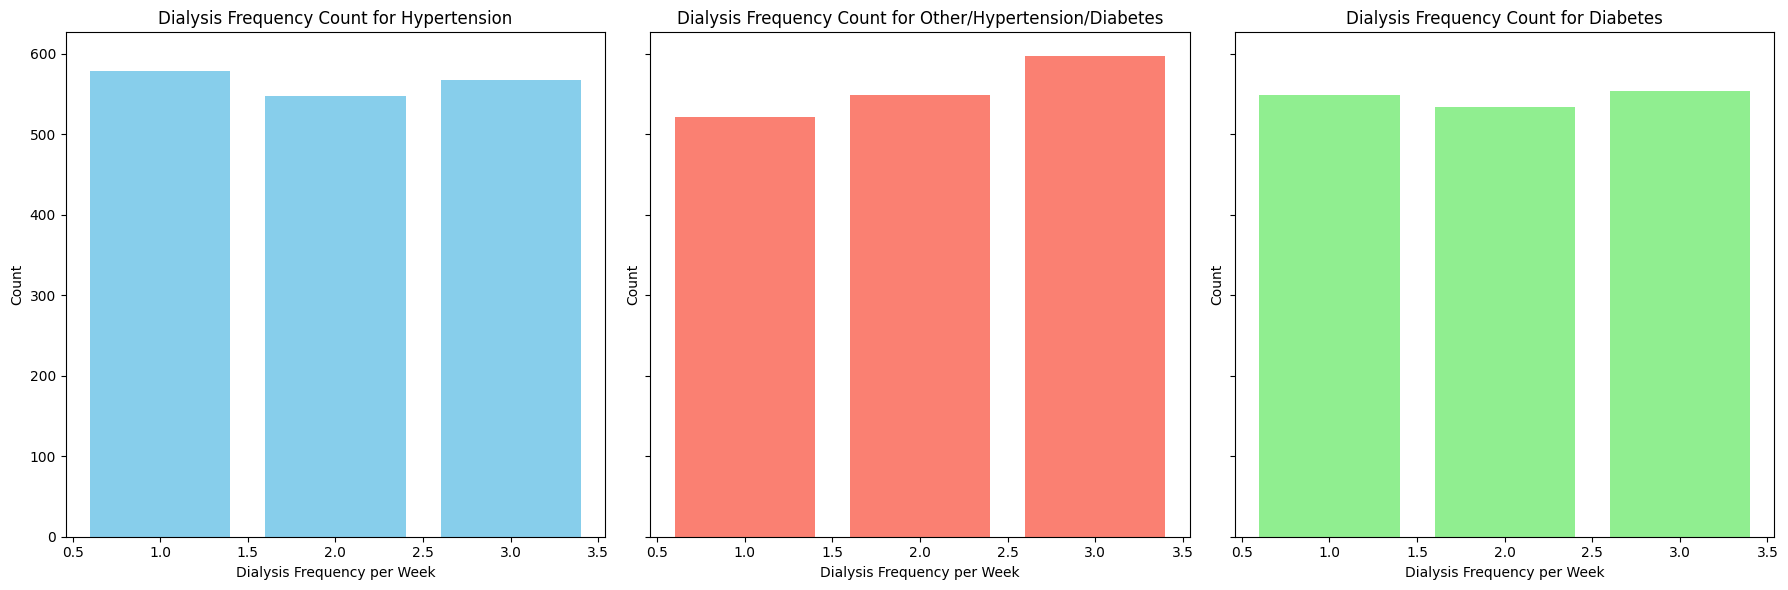

In [33]:
fig, axs = plt.subplots(1, len(kidney_failure_counts), figsize=(18, 6), sharey=True)

for i, (cause, count) in enumerate(kidney_failure_counts.items()):
    subset_df = df[df['KidneyFailureCause'] == cause]
    dialysis_frequency_counts = subset_df['DialysisFrequencyPerWeek'].value_counts().sort_index()
    axs[i].bar(dialysis_frequency_counts.index, dialysis_frequency_counts.values, color=colors[i])
    axs[i].set_title(f'Dialysis Frequency Count for {cause}')
    axs[i].set_xlabel('Dialysis Frequency per Week')
    axs[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

### Creatinine

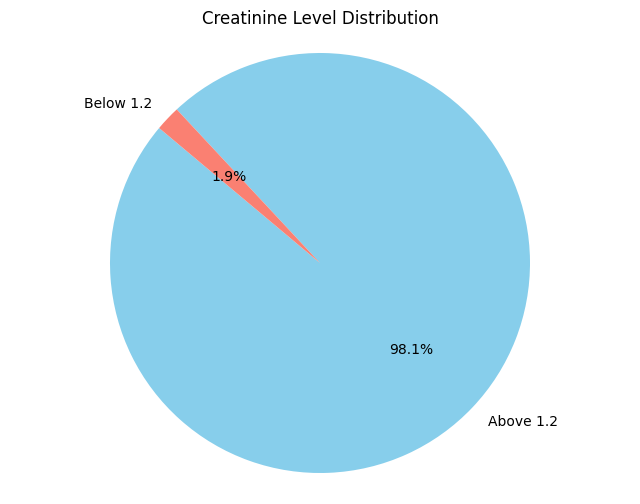

In [56]:
import matplotlib.pyplot as plt

def categorize_creatinine(creatinine):
    if creatinine < 1.2:
        return 'Below 1.2'
    else:
        return 'Above 1.2'

df['CreatinineCategory'] = df['Creatinine'].apply(categorize_creatinine)
creatinine_counts = df['CreatinineCategory'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(creatinine_counts, labels=creatinine_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Creatinine Level Distribution')
plt.axis('equal')
plt.show()



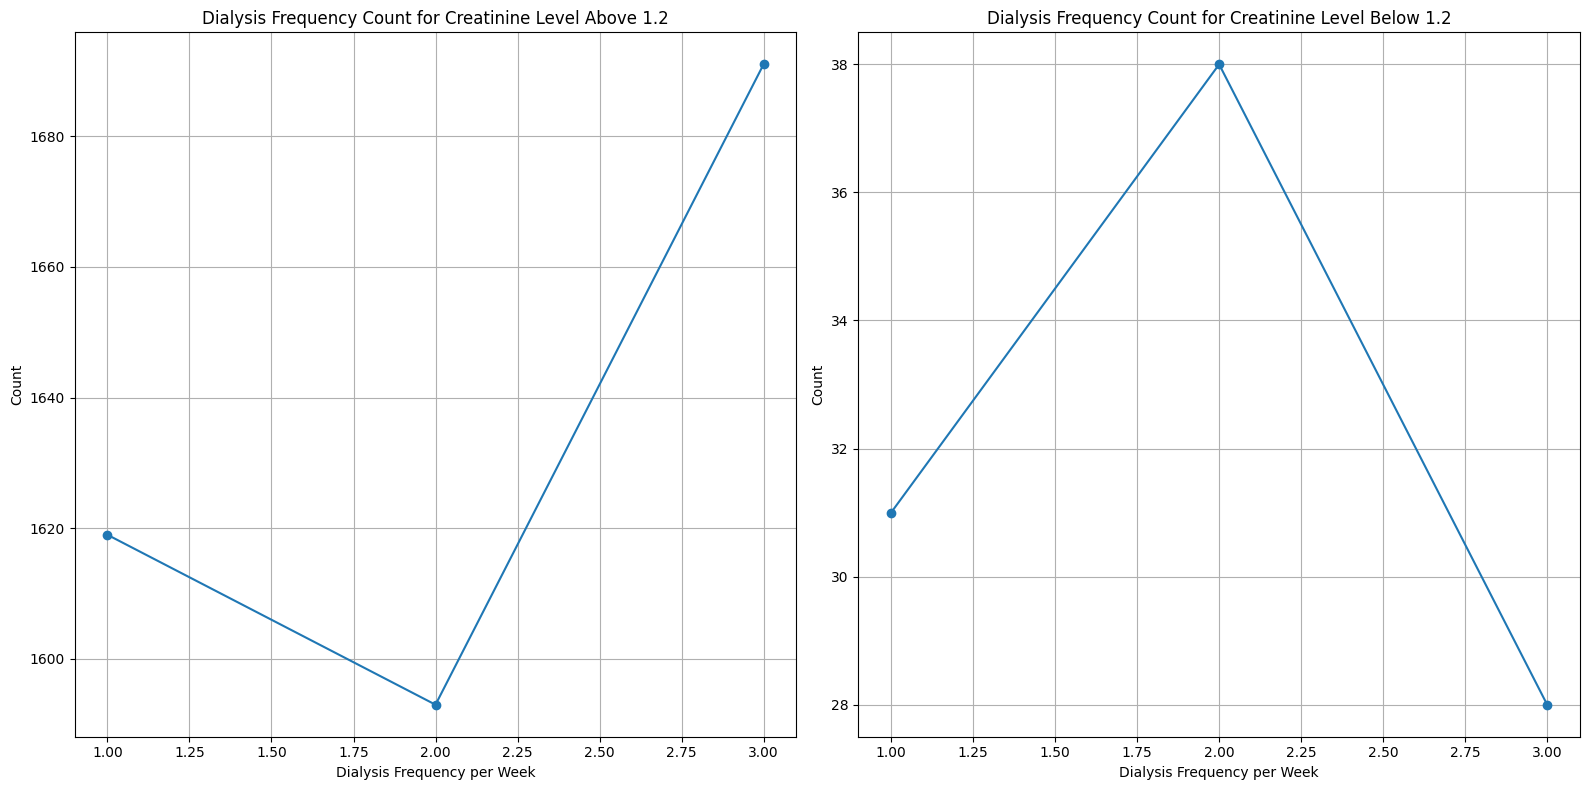

In [57]:
df['CreatinineCategory'] = df['Creatinine'].apply(categorize_creatinine)
fig, axs = plt.subplots(1, 2, figsize=(16, 8))  # 1 row, 2 columns

for i, category in enumerate(df['CreatinineCategory'].unique()):
    subset_df = df[df['CreatinineCategory'] == category]
    dialysis_frequency_counts = subset_df['DialysisFrequencyPerWeek'].value_counts().sort_index()
    axs[i].plot(dialysis_frequency_counts.index, dialysis_frequency_counts.values, marker='o', linestyle='-')
    axs[i].set_title(f'Dialysis Frequency Count for Creatinine Level {category}')
    axs[i].set_xlabel('Dialysis Frequency per Week')
    axs[i].set_ylabel('Count')
    axs[i].grid(True)

plt.tight_layout()
plt.show()

### Potassium

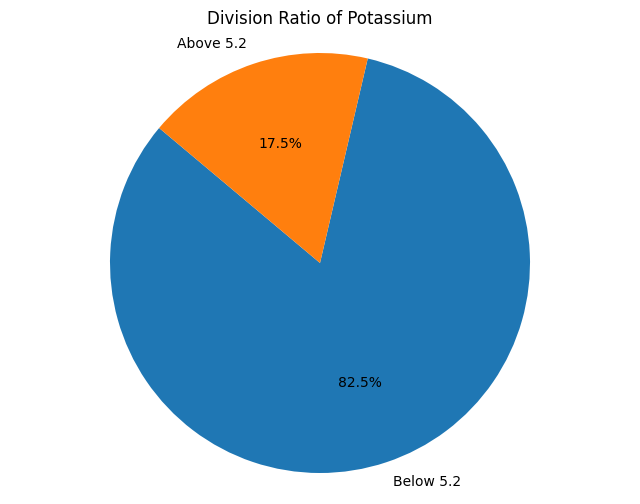

In [58]:
import matplotlib.pyplot as plt

potassium_counts = df['Potassium'].apply(lambda x: 'Below 5.2' if x < 5.2 else 'Above 5.2').value_counts()
potassium_ratio = potassium_counts / potassium_counts.sum()

plt.figure(figsize=(8, 6))
plt.pie(potassium_ratio, labels=potassium_ratio.index, autopct='%1.1f%%', startangle=140)
plt.title('Division Ratio of Potassium')
plt.axis('equal')
plt.show()



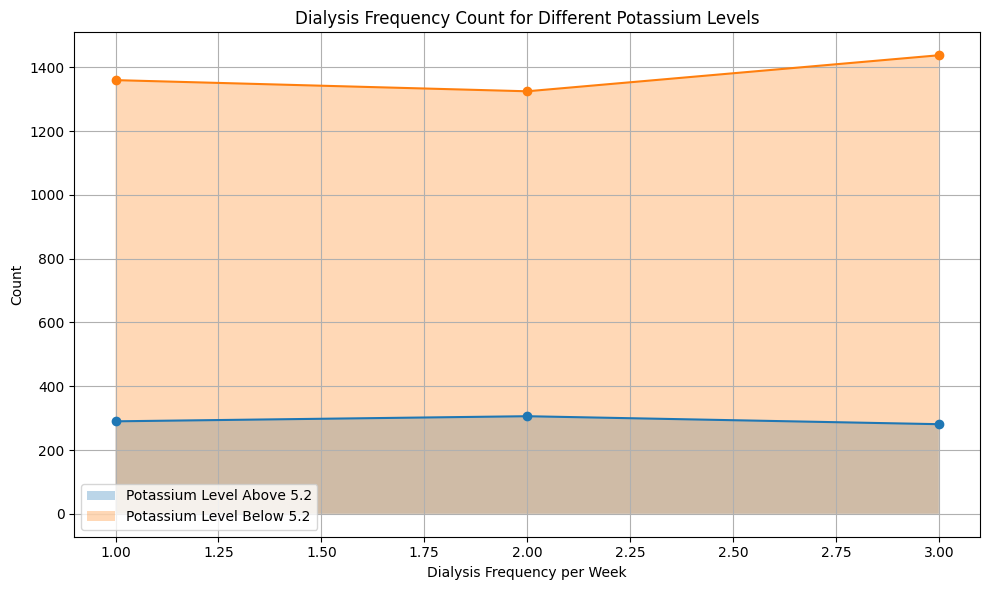

In [59]:
import matplotlib.pyplot as plt

def categorize_potassium(potassium):
    if potassium < 5.2:
        return 'Below 5.2'
    else:
        return 'Above 5.2'

df['PotassiumCategory'] = df['Potassium'].apply(categorize_potassium)

fig, ax = plt.subplots(figsize=(10, 6))

for category in df['PotassiumCategory'].unique():
    subset_df = df[df['PotassiumCategory'] == category]
    dialysis_frequency_counts = subset_df['DialysisFrequencyPerWeek'].value_counts().sort_index()
    ax.fill_between(dialysis_frequency_counts.index, dialysis_frequency_counts.values, alpha=0.3, label=f'Potassium Level {category}')
    ax.plot(dialysis_frequency_counts.index, dialysis_frequency_counts.values, marker='o', linestyle='-')

ax.set_title('Dialysis Frequency Count for Different Potassium Levels')
ax.set_xlabel('Dialysis Frequency per Week')
ax.set_ylabel('Count')
ax.grid(True)
ax.legend()

plt.tight_layout()
plt.show()

### Hemoglobin

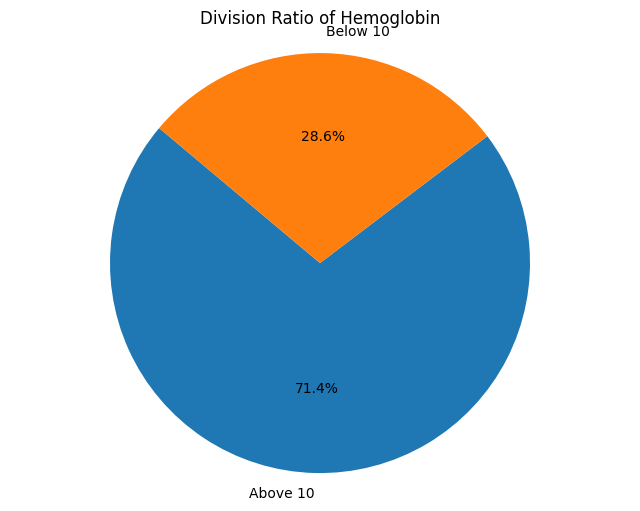

In [61]:
import matplotlib.pyplot as plt

hemoglobin_counts = df['Hemoglobin'].apply(lambda x: 'Below 10' if x < 10 else 'Above 10').value_counts()
hemoglobin_ratio = hemoglobin_counts / hemoglobin_counts.sum()

plt.figure(figsize=(8, 6))
plt.pie(hemoglobin_ratio, labels=hemoglobin_ratio.index, autopct='%1.1f%%', startangle=140)
plt.title('Division Ratio of Hemoglobin')
plt.axis('equal')
plt.show()


<Figure size 1000x600 with 0 Axes>

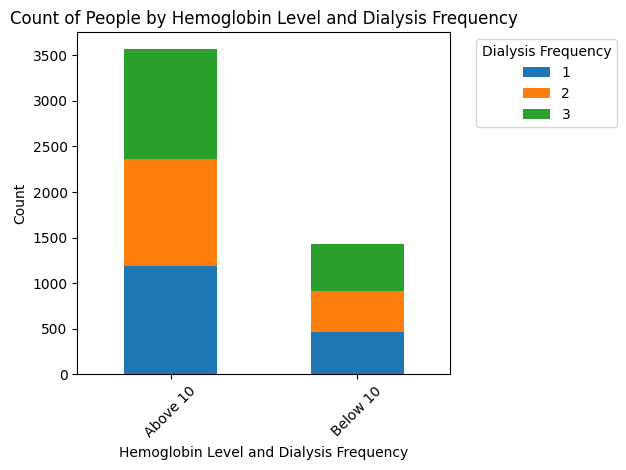

In [60]:
import matplotlib.pyplot as plt

hemoglobin_counts = df['Hemoglobin'].apply(lambda x: 'Below 10' if x < 10 else 'Above 10')
counts = df.groupby([hemoglobin_counts, 'DialysisFrequencyPerWeek']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
counts.plot(kind='bar', stacked=True)
plt.title('Count of People by Hemoglobin Level and Dialysis Frequency')
plt.xlabel('Hemoglobin Level and Dialysis Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Dialysis Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Disease Severity

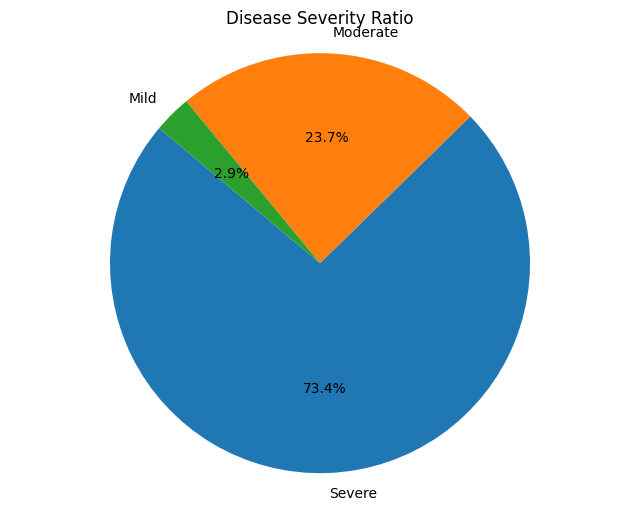

In [63]:
import matplotlib.pyplot as plt

severity_counts = df['DiseaseSeverity'].value_counts()
severity_ratio = severity_counts / severity_counts.sum()

plt.figure(figsize=(8, 6))
plt.pie(severity_ratio, labels=severity_ratio.index, autopct='%1.1f%%', startangle=140)
plt.title('Disease Severity Ratio')
plt.axis('equal')
plt.show()



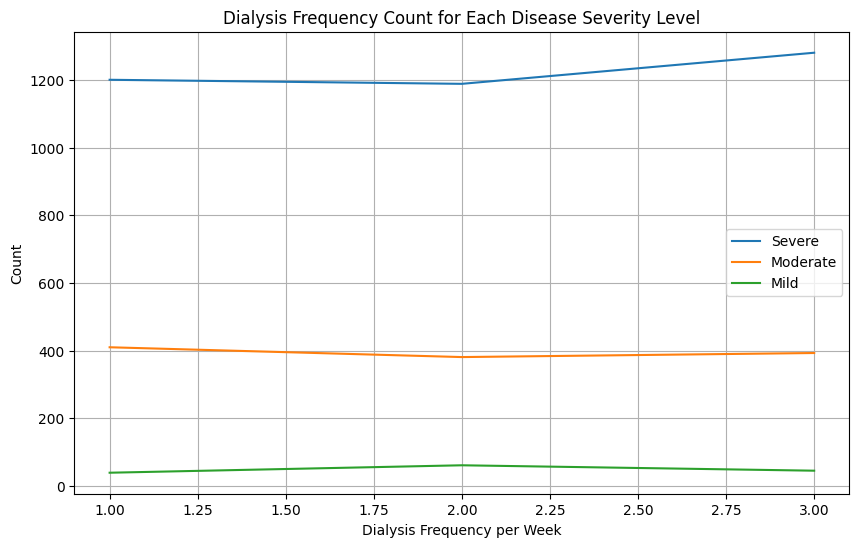

In [62]:
plt.figure(figsize=(10, 6))
for severity in severity_counts.index:
    subset_df = df[df['DiseaseSeverity'] == severity]
    dialysis_frequency_counts = subset_df['DialysisFrequencyPerWeek'].value_counts().sort_index()
    plt.plot(dialysis_frequency_counts.index, dialysis_frequency_counts.values, label=severity)

plt.title('Dialysis Frequency Count for Each Disease Severity Level')
plt.xlabel('Dialysis Frequency per Week')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

### Visualizing Categorical Variables

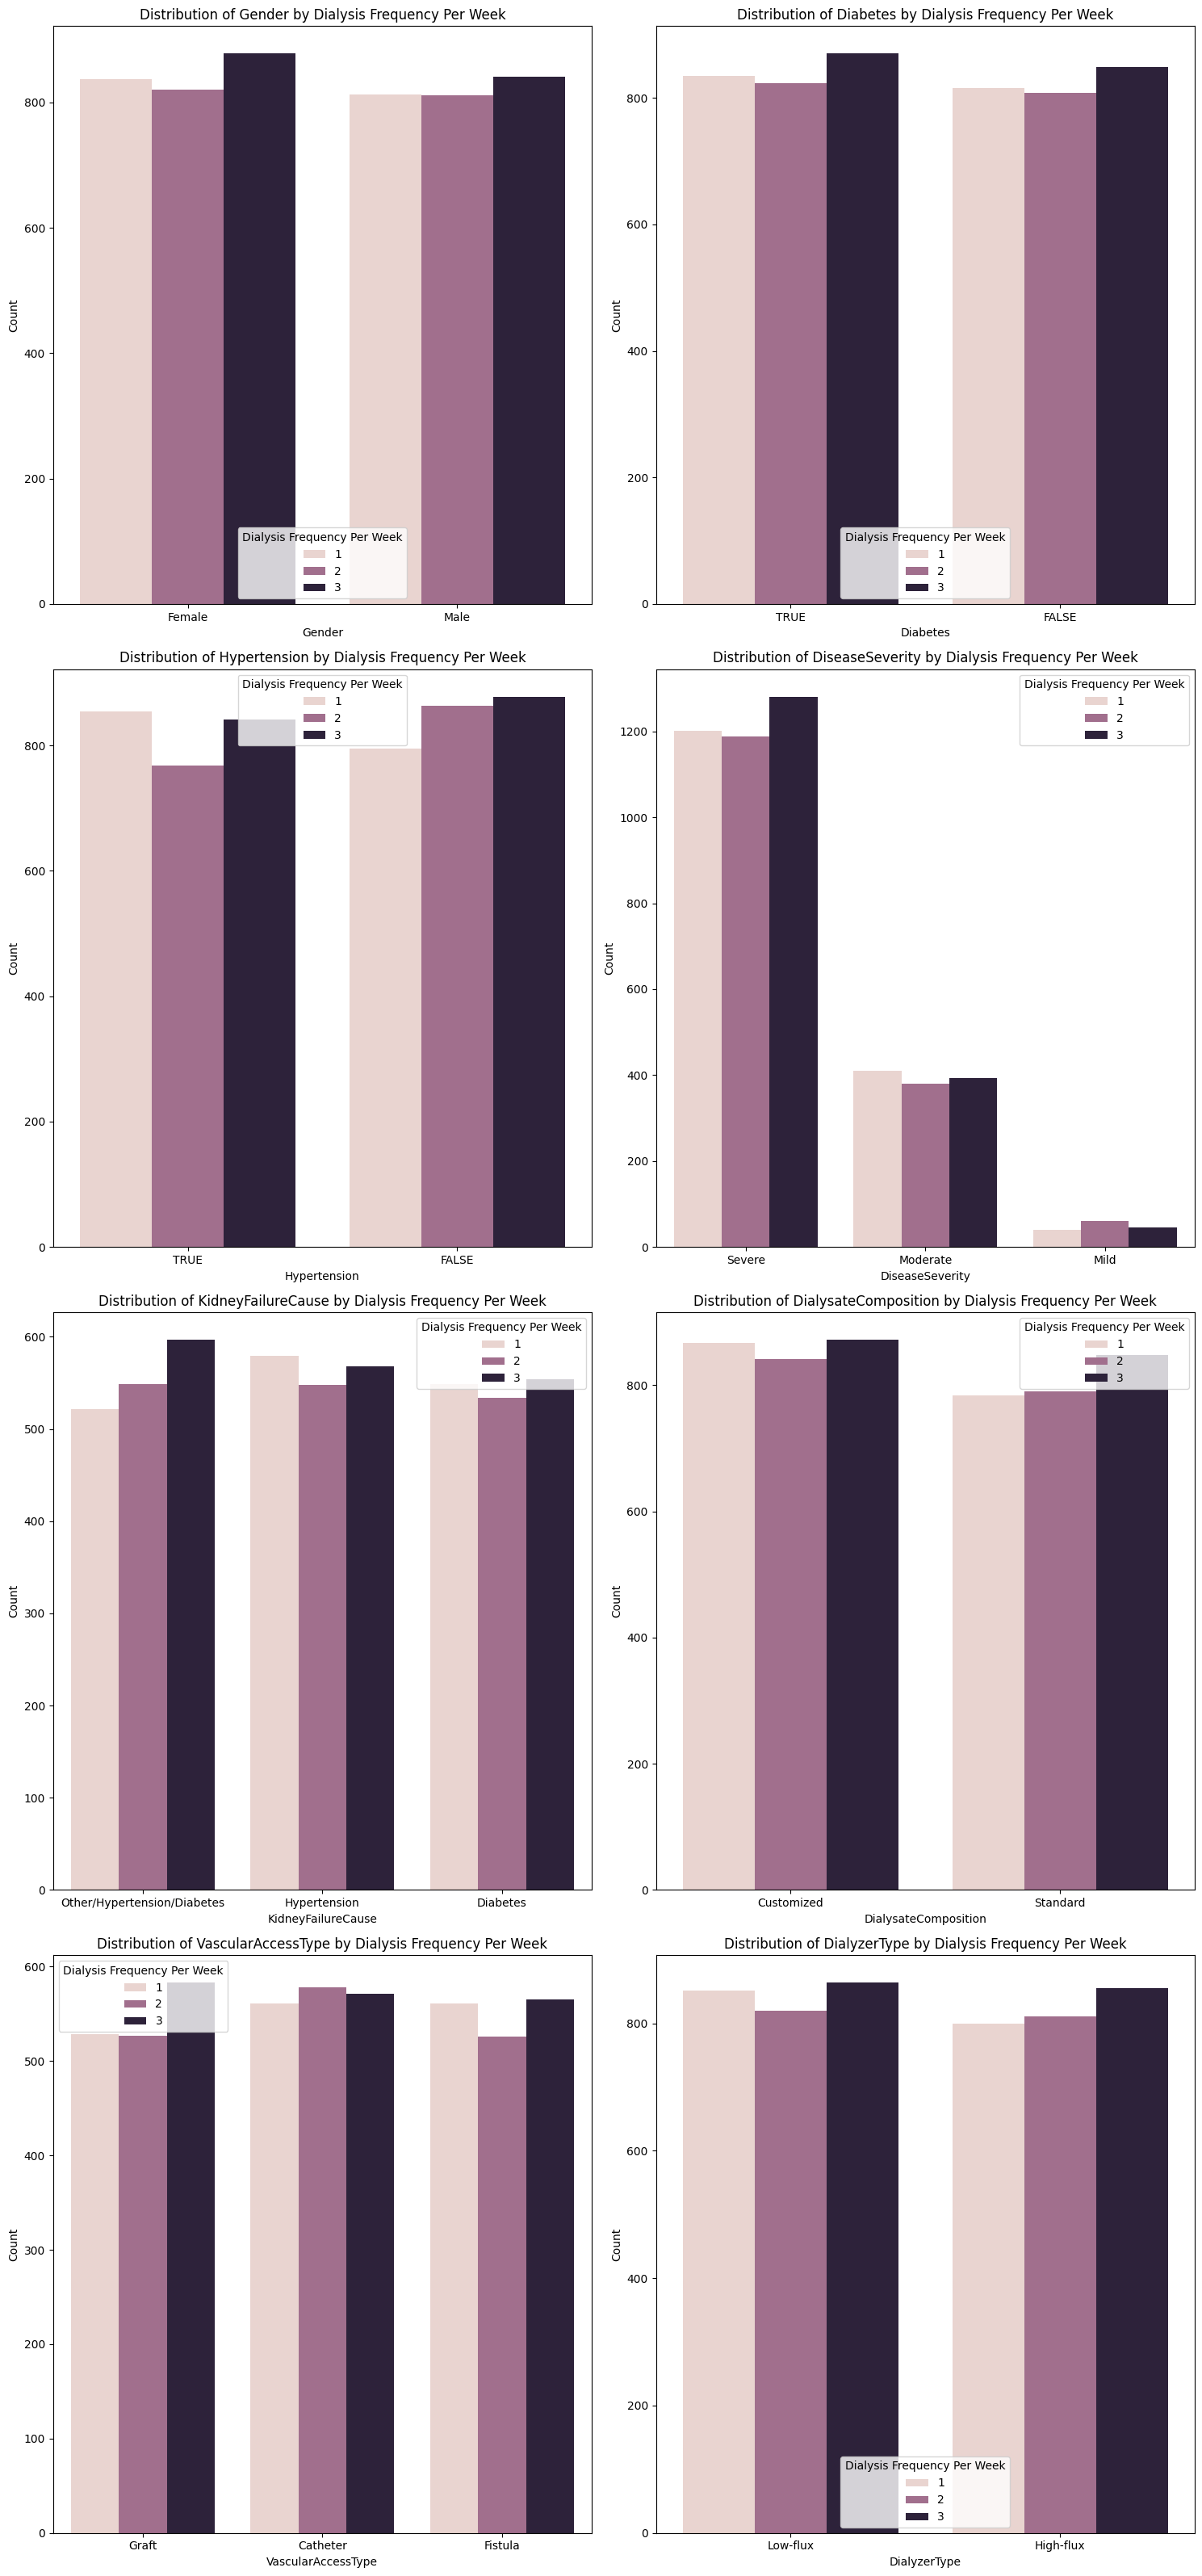

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_variables = ['Gender', 'Diabetes', 'Hypertension', 
                         'DiseaseSeverity', 'KidneyFailureCause', 
                         'DialysateComposition', 'VascularAccessType', 
                         'DialyzerType']

num_rows = len(categorical_variables) // 2 + len(categorical_variables) % 2
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8*num_rows))

for i, variable in enumerate(categorical_variables):
    sns.countplot(x=variable, hue='DialysisFrequencyPerWeek', data=df, ax=axes[i//num_cols, i%num_cols])
    axes[i//num_cols, i%num_cols].set_title('Distribution of {} by Dialysis Frequency Per Week'.format(variable))
    axes[i//num_cols, i%num_cols].set_xlabel(variable)
    axes[i//num_cols, i%num_cols].set_ylabel('Count')
    axes[i//num_cols, i%num_cols].legend(title='Dialysis Frequency Per Week')

for i in range(len(categorical_variables), num_rows*num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


### Class Distribution of Target Variable

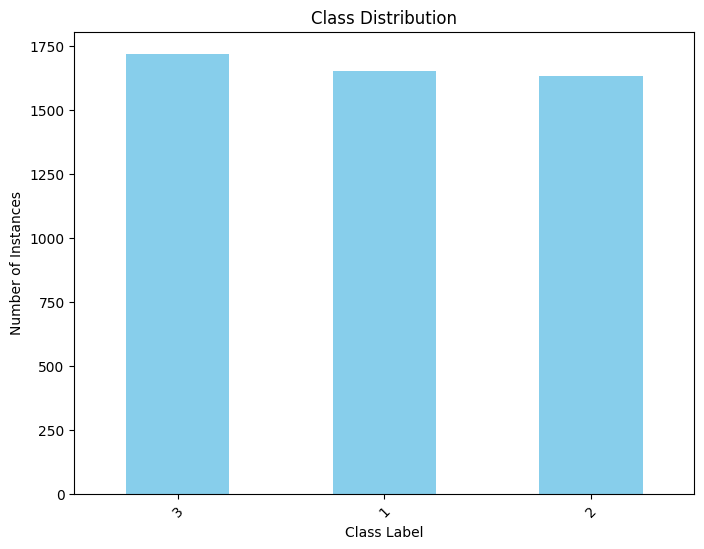

Class Frequencies:
DialysisFrequencyPerWeek
3    0.3438
1    0.3300
2    0.3262
Name: count, dtype: float64


In [64]:
import matplotlib.pyplot as plt

class_counts = df['DialysisFrequencyPerWeek'].value_counts()
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Class Label')
plt.ylabel('Number of Instances')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()

class_frequencies = class_counts / len(df)
print("Class Frequencies:")
print(class_frequencies)


# MACHINE LEARNING 

### CLASSIFICATION MODEL

In [41]:
x = df[['VascularAccessType_encoded', 'DiseaseSeverity_encoded', 'KidneyFailureCause_encoded', 
         'DialysateComposition_encoded', 'FluidRemovalRateMLPerHour', 'URR', 'DryWeightKG','HeartRate','PostDialysisBloodPressure','DuringDialysisBloodPressure',  
        'KtV', 'DialysisDurationHours', 'Hematocrit', 'Urea', 'Creatinine']]
y = df['DialysisFrequencyPerWeek']

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=42)

### LOGISTIC REGRESSION

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print("Classification Report:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Classification Report:
              precision    recall  f1-score   support

           1       0.36      0.19      0.25       354
           2       0.30      0.24      0.26       319
           3       0.32      0.55      0.41       327

    accuracy                           0.32      1000
   macro avg       0.33      0.33      0.31      1000
weighted avg       0.33      0.32      0.31      1000

Accuracy: 0.324


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

logReg = LogisticRegression()

n_folds = 10

kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
pipeline = make_pipeline(StandardScaler(), logReg)
cv_scores = cross_val_score(pipeline, x, y, cv=kf)
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.332 0.324 0.332 0.338 0.342 0.328 0.312 0.286 0.378 0.352]
Mean accuracy: 0.33240000000000003


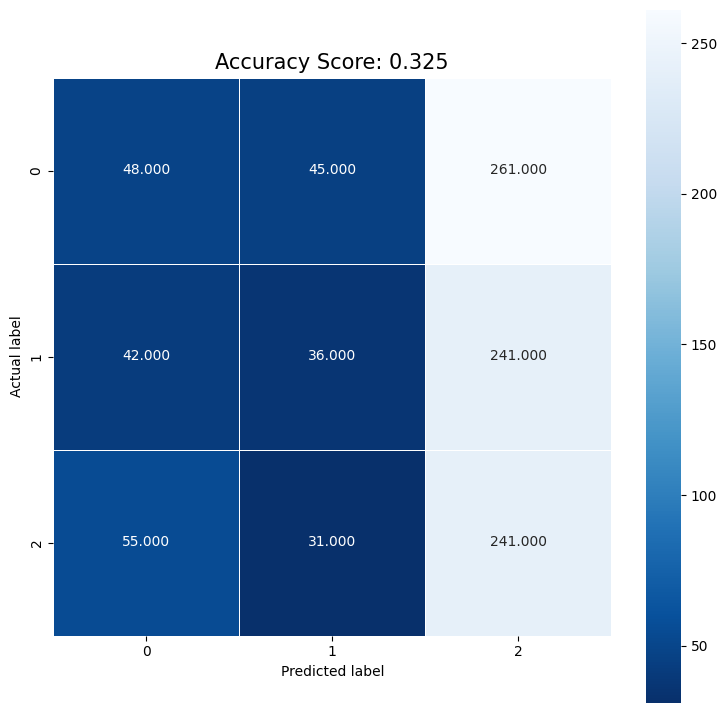

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


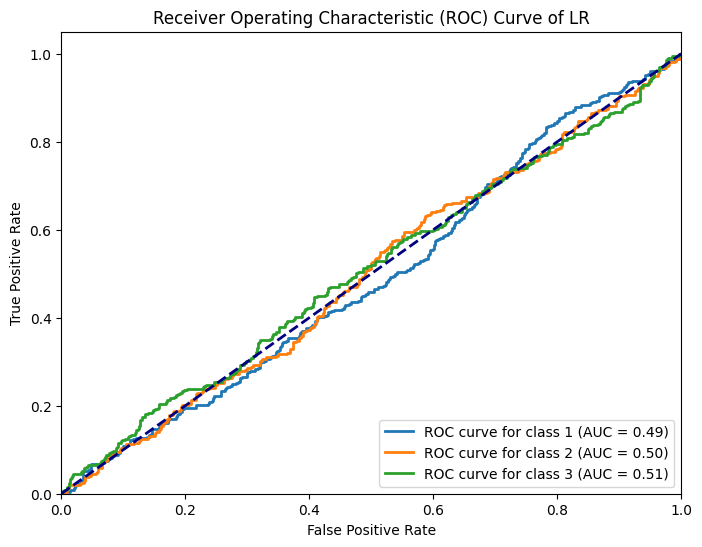

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_probs = lr.predict_proba(X_test)

y_test_binarized = label_binarize(y_test, classes=lr.classes_)
plt.figure(figsize=(8, 6))
for i in range(len(lr.classes_)):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], lr_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve for class %d (AUC = %0.2f)' % (lr.classes_[i], roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of LR')
plt.legend(loc="lower right")
plt.show()


### RANDOM FOREST CLASSIFIER

In [65]:
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

# train the Gaussian model
clf = GaussianNB()
clf.fit(X_train, y_train)

# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test

# training RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# use the RFC model to predict the labels of the test data
rfc_predicted = rfc.predict(X_test)
rfc_expected = y_test

In [66]:
matches = (predicted == expected)
print(matches.sum())
print(len(matches))

#score1= (rfc_matches.sum()/float(len(rfc_matches)))

rfc_matches = (rfc_predicted == rfc_expected)
print("Overall Accuracy for RFC = ", rfc_matches.sum()/float(len(rfc_matches)))

355
1000
Overall Accuracy for RFC =  0.337


In [67]:
from sklearn.model_selection import cross_val_score, KFold

num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(rfc, X_train, y_train, cv=kf)

print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation of CV Accuracy:", cv_scores.std())

Cross-validation scores: [0.31   0.325  0.365  0.33   0.3275 0.3275 0.3425 0.325  0.3525 0.3575]
Mean CV Accuracy: 0.33625
Standard Deviation of CV Accuracy: 0.01647915349767699


In [68]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
print(metrics.classification_report(rfc_expected, rfc_predicted))

              precision    recall  f1-score   support

           1       0.42      0.26      0.32       354
           2       0.33      0.25      0.28       319
           3       0.34      0.56      0.42       327

    accuracy                           0.36      1000
   macro avg       0.36      0.36      0.34      1000
weighted avg       0.36      0.35      0.34      1000

              precision    recall  f1-score   support

           1       0.34      0.27      0.30       354
           2       0.34      0.31      0.32       319
           3       0.34      0.43      0.38       327

    accuracy                           0.34      1000
   macro avg       0.34      0.34      0.33      1000
weighted avg       0.34      0.34      0.33      1000



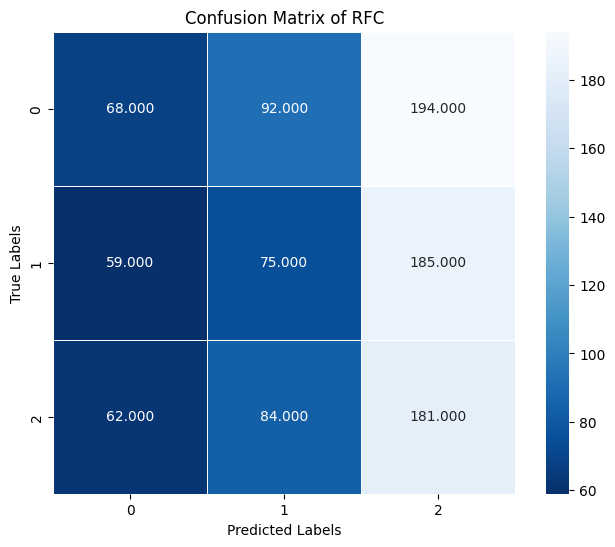

In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix,annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.title("Confusion Matrix of RFC")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


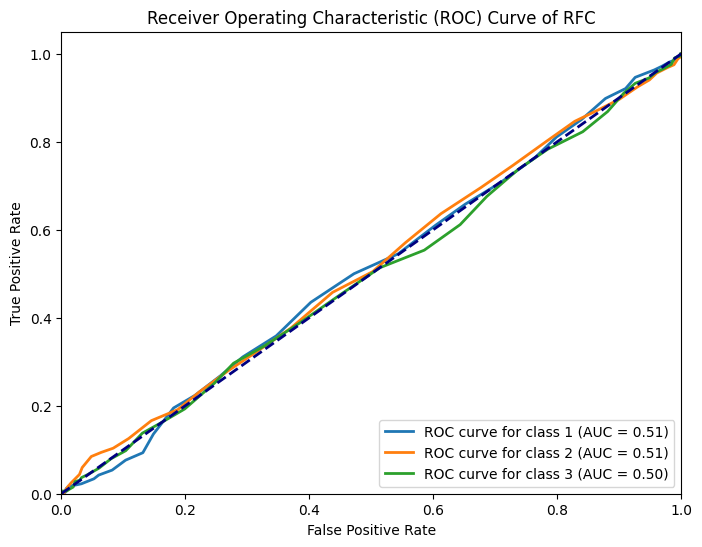

In [70]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

rfc.fit(X_train, y_train)
rfc_probs = rfc.predict_proba(X_test)
plt.figure(figsize=(8, 6))
for i in range(len(rfc.classes_)):
    fpr, tpr, _ = roc_curve(y_test == rfc.classes_[i], rfc_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve for class %d (AUC = %0.2f)' % (rfc.classes_[i], roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of RFC')
plt.legend(loc="lower right")
plt.show()


### GRADIENT BOOSTING CLASSIFIER

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gbc = GradientBoostingClassifier()

gbc.fit(X_train, y_train)
gbc_predicted = gbc.predict(X_test)

gbc_accuracy = accuracy_score(y_test, gbc_predicted)
print("Gradient Boosting Classifier Accuracy:", gbc_accuracy)

Gradient Boosting Classifier Accuracy: 0.357


In [73]:
print("Classification Report:")
print(classification_report(y_test, gbc_predicted))

Classification Report:
              precision    recall  f1-score   support

           1       0.37      0.29      0.33       354
           2       0.34      0.32      0.33       319
           3       0.36      0.46      0.40       327

    accuracy                           0.36      1000
   macro avg       0.36      0.36      0.35      1000
weighted avg       0.36      0.36      0.35      1000



In [74]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_scores_gbc = cross_val_score(gbc, X_train, y_train, cv=kf)

print("Cross-validation scores for Gradient Boosting Classifier:", cv_scores_gbc)
print("Mean CV Accuracy for Gradient Boosting Classifier:", cv_scores_gbc.mean())
print("Standard Deviation of CV Accuracy for Gradient Boosting Classifier:", cv_scores_gbc.std())

Cross-validation scores for Gradient Boosting Classifier: [0.3525 0.3175 0.325  0.3425 0.325  0.355  0.37   0.32   0.3425 0.3325]
Mean CV Accuracy for Gradient Boosting Classifier: 0.33825
Standard Deviation of CV Accuracy for Gradient Boosting Classifier: 0.016357337802955584


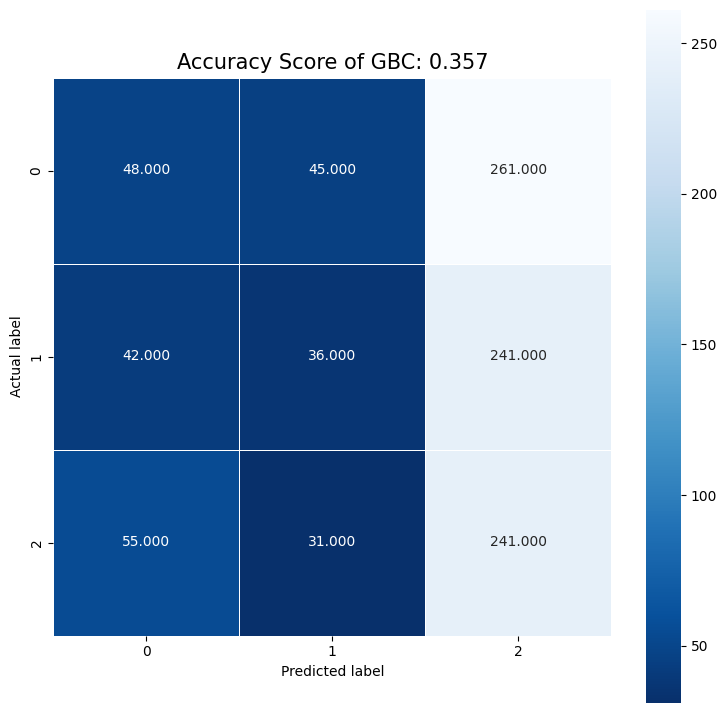

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score of GBC: {0}'.format(gbc_accuracy)
plt.title(all_sample_title, size = 15);

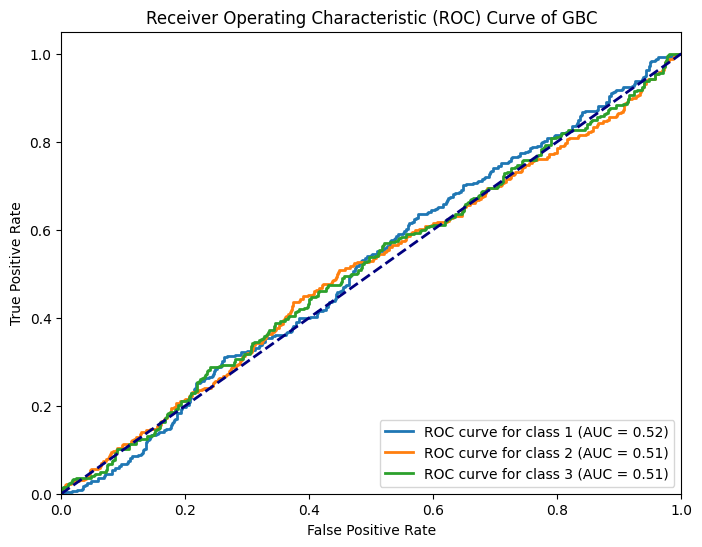

In [76]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

gbc.fit(X_train, y_train)
gbc_probs = gbc.predict_proba(X_test)
plt.figure(figsize=(8, 6))
for i in range(len(gbc.classes_)):
    fpr, tpr, _ = roc_curve(y_test == gbc.classes_[i], gbc_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='ROC curve for class %d (AUC = %0.2f)' % (gbc.classes_[i], roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of GBC')
plt.legend(loc="lower right")
plt.show()


# HYPERPARAMETRIC TUNING 

### Logistic Regression

In [77]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'penalty': ['l1', 'l2'], 
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  
}

lr = LogisticRegression(max_iter=1000, random_state=42)
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Best Hyperparameters: {'C': 0.001, 'penalty': 'l2'}
Accuracy: 0.313


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1168, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

### Random Forest Classifier

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'sqrt'], 
    'bootstrap': [True, False]  
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_rf_classifier = grid_search.best_estimator_


accuracy = best_rf_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
436 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ut

Best Hyperparameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.346


### Gradient Boosting Classifier

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  
    'learning_rate': [0.01, 0.1, 0.2],  
    'max_depth': [3, 4, 5],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'sqrt'],  
}

gb_classifier = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_gb_classifier = grid_search.best_estimator_


accuracy = best_gb_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1215 fits failed out of a total of 2430.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
634 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ut

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.365
